In [1]:
# pip install --upgrade pandas seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

# **1. Temperatures**

In [3]:
# Temperature: Has 20 different temperatures across the oven. The units are °C.
data = pd.ExcelFile('/kaggle/input/cokerunit12/Coker12.xlsx')
df1 = data.parse('Temperatures')
df1 = df1.round(2)
df1

,Date,TI12145.pv,TI12146.pv,TI12147.pv,TI12148.pv,TI12141.pv,TI12142.pv,TI12152.pv,TI12101.pv,TI12102.pv,TI12103.pv,TI12105.pv,TIC12105.pv,TI12106.pv,TI12107.pv,TI12108.pv,TI12109.pv,TI12110.pv,TI12150A.pv,TI12150B.pv
0,2016-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-03,801.00,767.10,805.20,762.40,479.70,NaN,488.10,431.10,431.70,415.20,479.80,480.00,603.20,593.10,NaN,NaN,571.20,NaN,NaN
3,2016-07-04,802.30,766.60,808.20,761.90,480.50,NaN,489.00,430.70,431.30,414.80,479.80,480.00,601.90,596.00,NaN,NaN,572.70,NaN,NaN
4,2016-07-05,802.50,765.80,807.20,759.50,480.80,NaN,489.20,430.70,431.30,414.80,479.80,480.00,602.10,596.20,NaN,NaN,574.20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,2018-06-12,1400.29,1277.26,1378.13,1200.63,814.21,770.51,863.87,676.54,705.14,788.43,790.05,790.87,951.22,945.73,982.20,1010.20,952.24,803.74,811.81
712,2018-06-13,1402.14,1278.87,1379.90,1202.00,815.28,771.49,865.02,677.32,705.97,789.36,790.98,791.80,952.41,946.92,983.46,1011.50,953.43,804.69,812.77
713,2018-06-14,1403.99,1280.48,1381.68,1203.37,816.36,772.47,866.17,678.10,706.79,790.30,791.91,792.72,953.59,948.10,984.73,1012.79,954.62,805.64,813.74
714,2018-06-15,1405.84,1282.08,1383.45,1204.74,817.43,773.46,867.31,678.89,707.62,791.23,792.83,793.65,954.78,949.29,985.99,1014.09,955.82,806.59,814.71


In [4]:
df1.isnull().sum()

Date             0
TI12145.pv      77
TI12146.pv      56
TI12147.pv      56
TI12148.pv      73
TI12141.pv       5
TI12142.pv      42
TI12152.pv       5
TI12101.pv      79
TI12102.pv      78
TI12103.pv      75
TI12105.pv      59
TIC12105.pv     38
TI12106.pv      55
TI12107.pv      51
TI12108.pv     168
TI12109.pv     163
TI12110.pv      59
TI12150A.pv    214
TI12150B.pv    214
dtype: int64

In [5]:
# Setting up graphics and color palette
rcParams['figure.figsize'] = 9, 7

sns.set_context('notebook')
sns.set_style('whitegrid')

pal = sns.color_palette('Set3', n_colors=10)
pal[0], pal[1], pal[2], pal[3], pal[4] = pal[9], pal[0], pal[3], pal[4], pal[2]
sns.set_palette(pal)

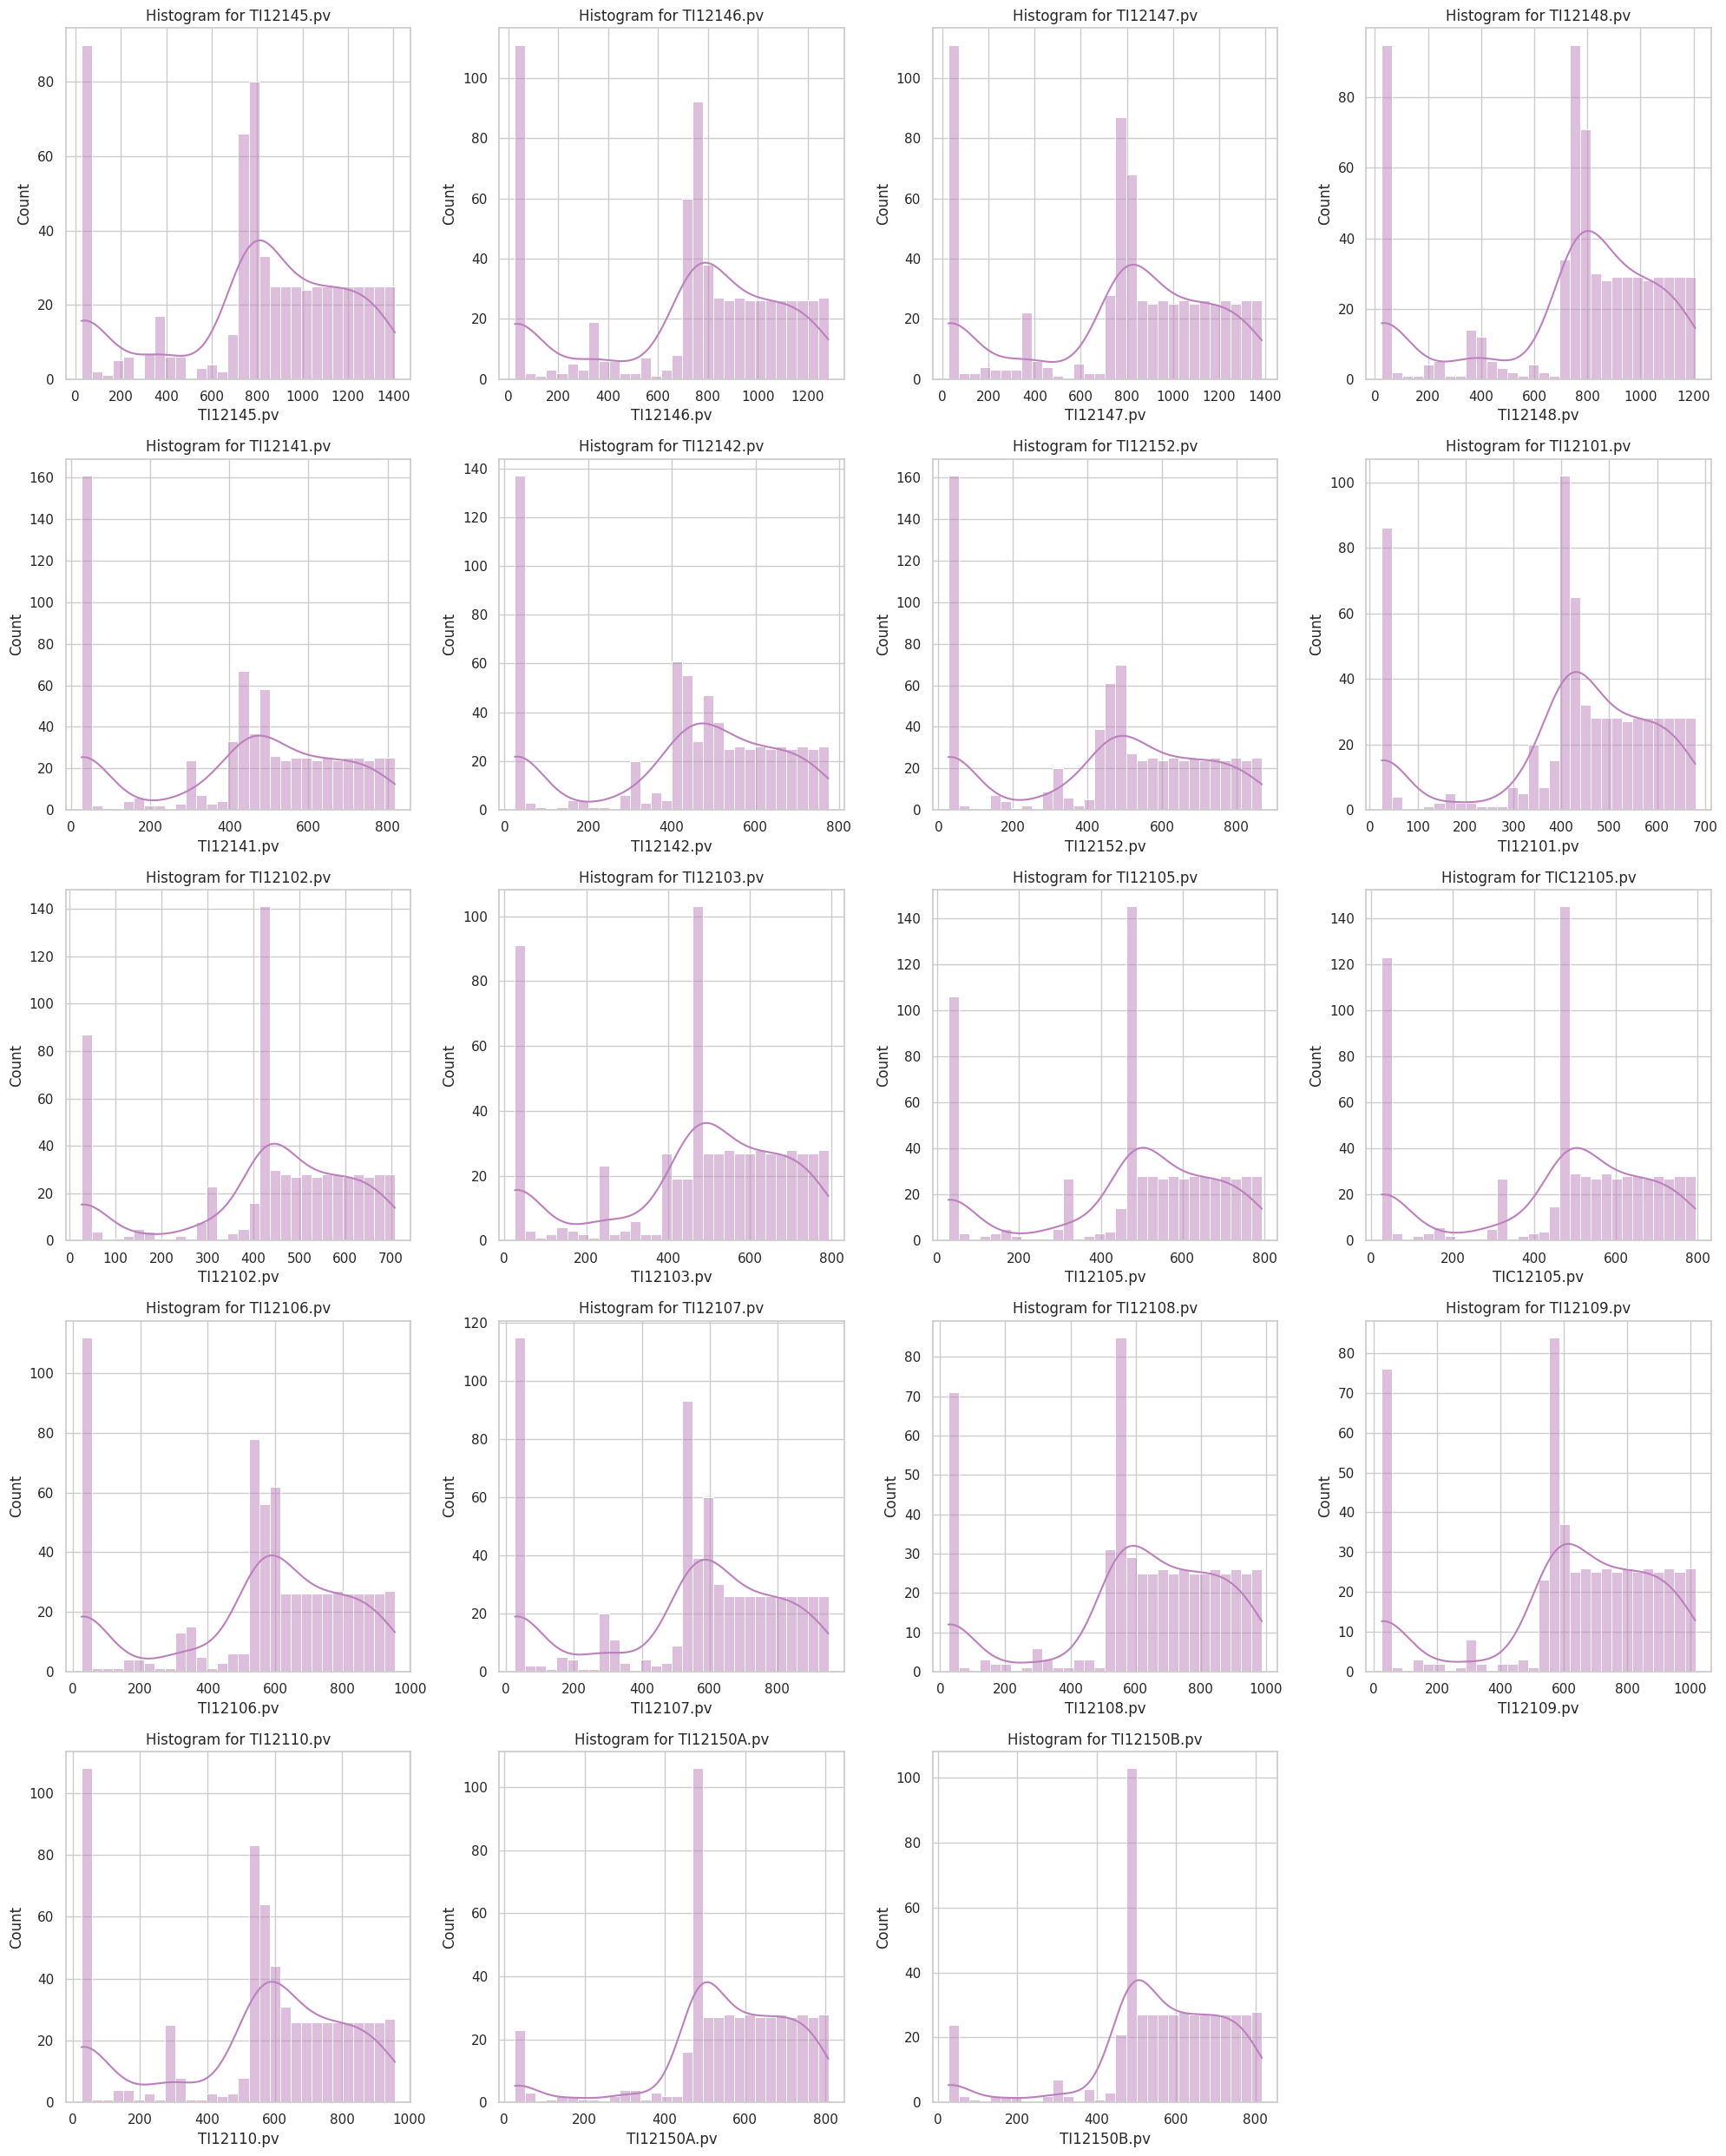

In [6]:
import matplotlib.pyplot as plt

columns_to_plot = [col for col in df1.columns if col != 'Date']
n_cols = 4
n_rows = -(-len(columns_to_plot) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()


for i, column in enumerate(columns_to_plot) :
    sns.histplot(data=df1, x=column, kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [7]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['Day'] = df1['Date'].dt.day

df1

,Date,TI12145.pv,TI12146.pv,TI12147.pv,TI12148.pv,TI12141.pv,TI12142.pv,TI12152.pv,TI12101.pv,TI12102.pv,...,TI12106.pv,TI12107.pv,TI12108.pv,TI12109.pv,TI12110.pv,TI12150A.pv,TI12150B.pv,Year,Month,Day
0,2016-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,7,1
1,2016-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,7,2
2,2016-07-03,801.00,767.10,805.20,762.40,479.70,NaN,488.10,431.10,431.70,...,603.20,593.10,NaN,NaN,571.20,NaN,NaN,2016,7,3
3,2016-07-04,802.30,766.60,808.20,761.90,480.50,NaN,489.00,430.70,431.30,...,601.90,596.00,NaN,NaN,572.70,NaN,NaN,2016,7,4
4,2016-07-05,802.50,765.80,807.20,759.50,480.80,NaN,489.20,430.70,431.30,...,602.10,596.20,NaN,NaN,574.20,NaN,NaN,2016,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,2018-06-12,1400.29,1277.26,1378.13,1200.63,814.21,770.51,863.87,676.54,705.14,...,951.22,945.73,982.20,1010.20,952.24,803.74,811.81,2018,6,12
712,2018-06-13,1402.14,1278.87,1379.90,1202.00,815.28,771.49,865.02,677.32,705.97,...,952.41,946.92,983.46,1011.50,953.43,804.69,812.77,2018,6,13
713,2018-06-14,1403.99,1280.48,1381.68,1203.37,816.36,772.47,866.17,678.10,706.79,...,953.59,948.10,984.73,1012.79,954.62,805.64,813.74,2018,6,14
714,2018-06-15,1405.84,1282.08,1383.45,1204.74,817.43,773.46,867.31,678.89,707.62,...,954.78,949.29,985.99,1014.09,955.82,806.59,814.71,2018,6,15


## **1. Plot Temperatures Time Series**  

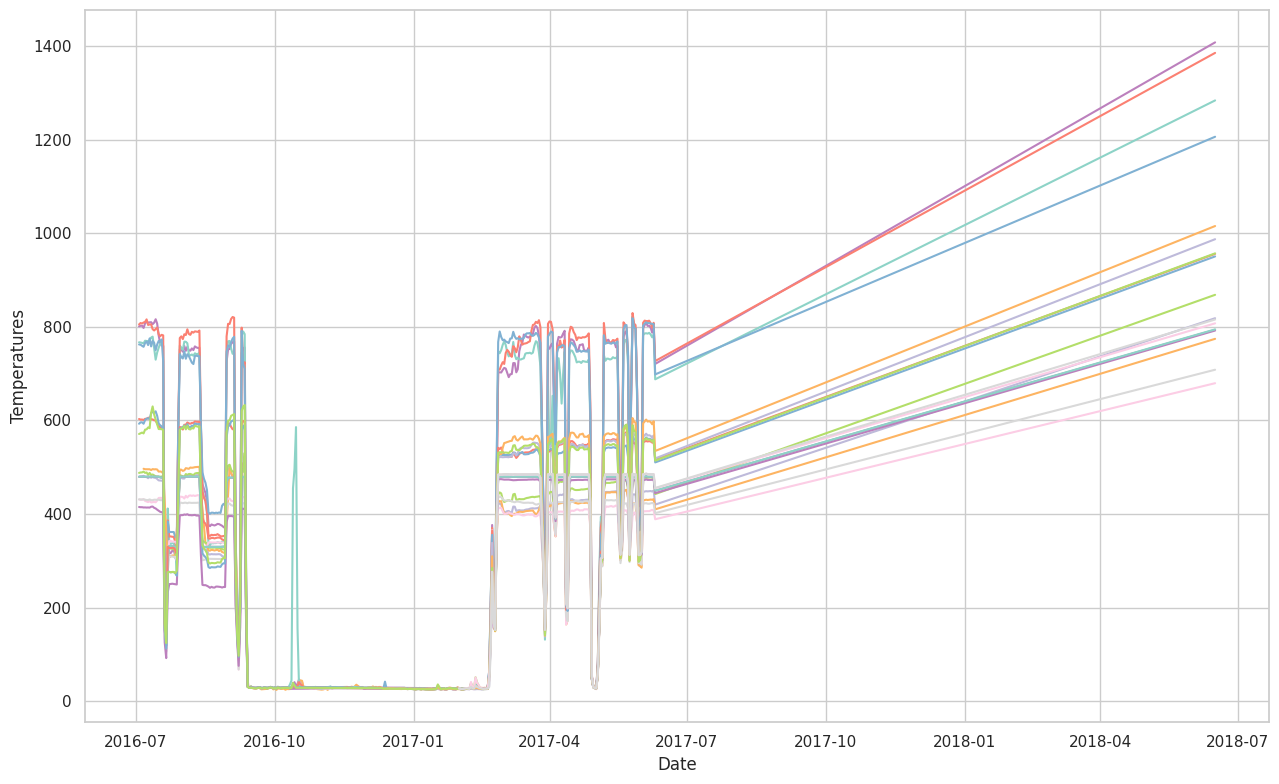

In [8]:
plt.figure(figsize=(13, 8))

columns_to_plot = df1.columns[1:20]

for col in columns_to_plot:
    sns.lineplot(data=df1, x=df1['Date'], y=col)

plt.ylabel("Temperatures")
plt.tight_layout()
plt.show()

### 1. Plot bulan juni 2017 keatas

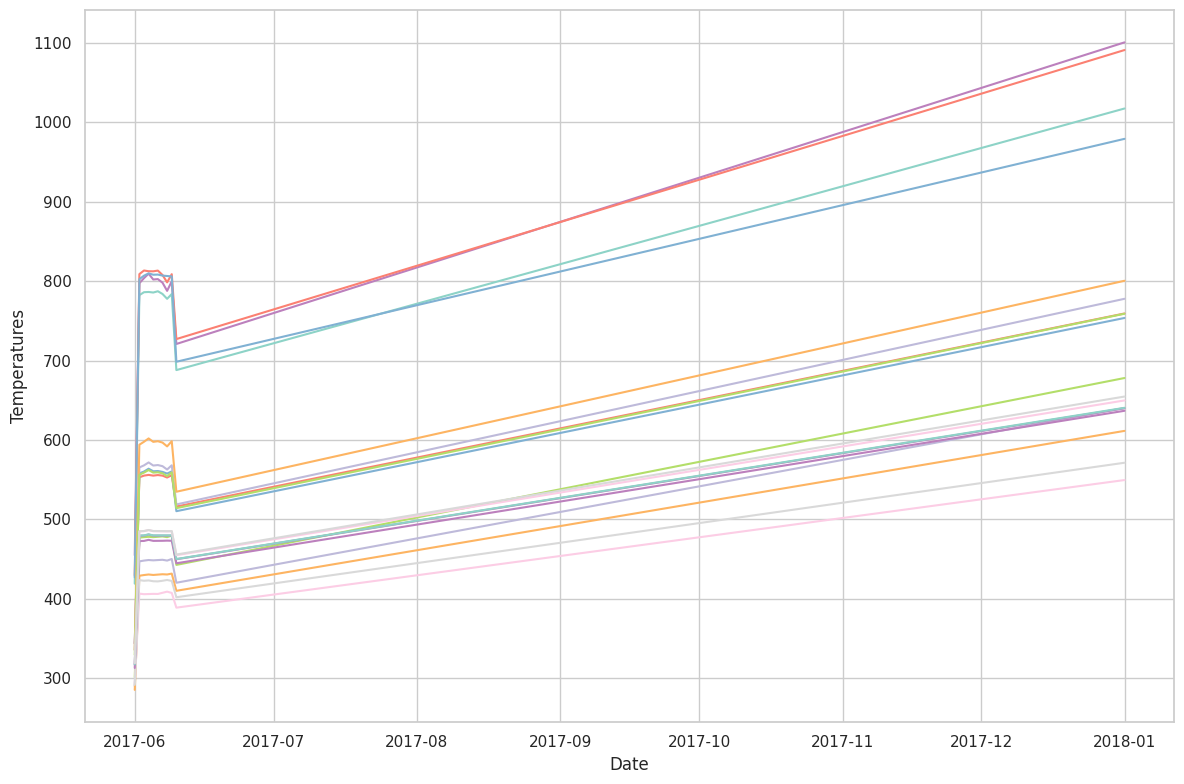

In [9]:
filtered_df = df1[(df1['Year'] == 2017) & (df1['Month'] >= 6)]
plt.figure(figsize=(12, 8))

columns_to_plot = filtered_df.columns[1:20]

for col in columns_to_plot:
    sns.lineplot(data=filtered_df, x=df1['Date'], y=col)

plt.ylabel("Temperatures")
plt.tight_layout()
plt.show()

###  2. Plot Februari 2017

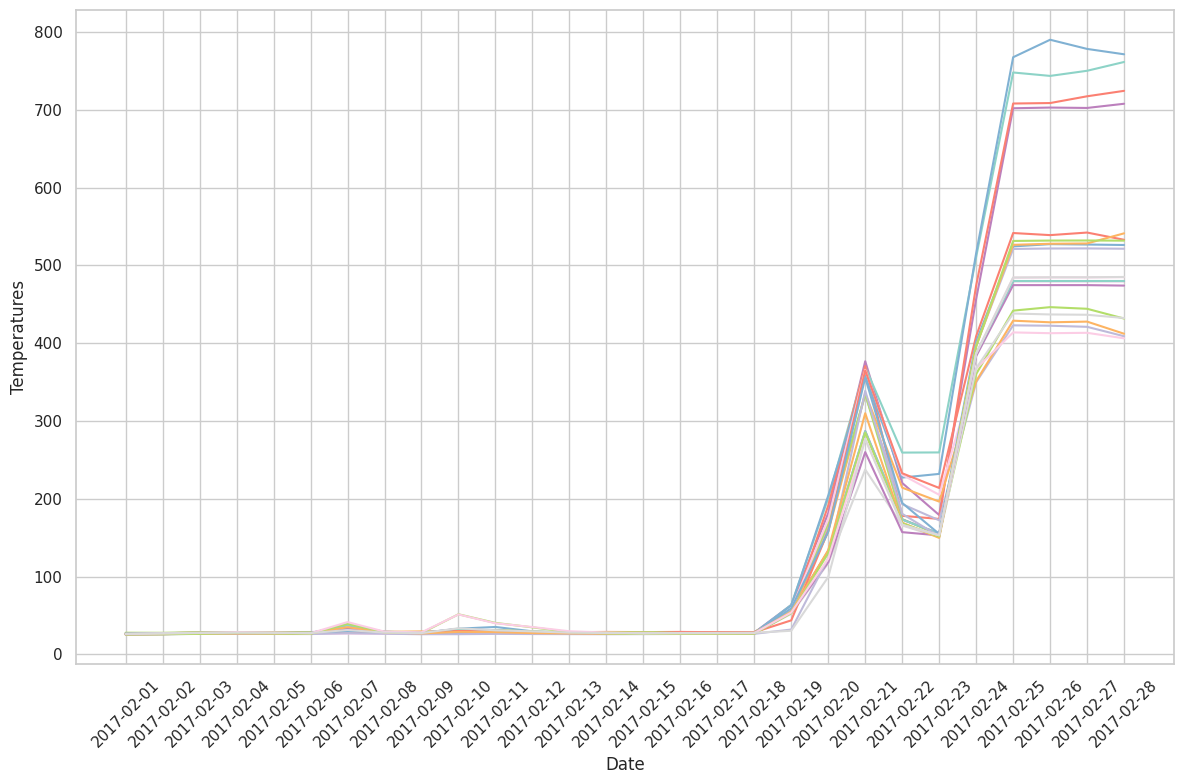

In [10]:
filtered_df1 = df1[(df1['Year']  == 2017) & (df1['Month'] >= 2) & (df1['Month'] < 3)]
plt.figure(figsize=(12, 8))

columns_to_plot = filtered_df1.columns[1:20]

for col in columns_to_plot:
    sns.lineplot(data=filtered_df1, x=df1['Date'], y=col)

plt.xticks(ticks=filtered_df1['Date'], rotation=45)
plt.ylabel("Temperatures")
plt.tight_layout()
plt.show()

### **3. Plot Juni 2017**

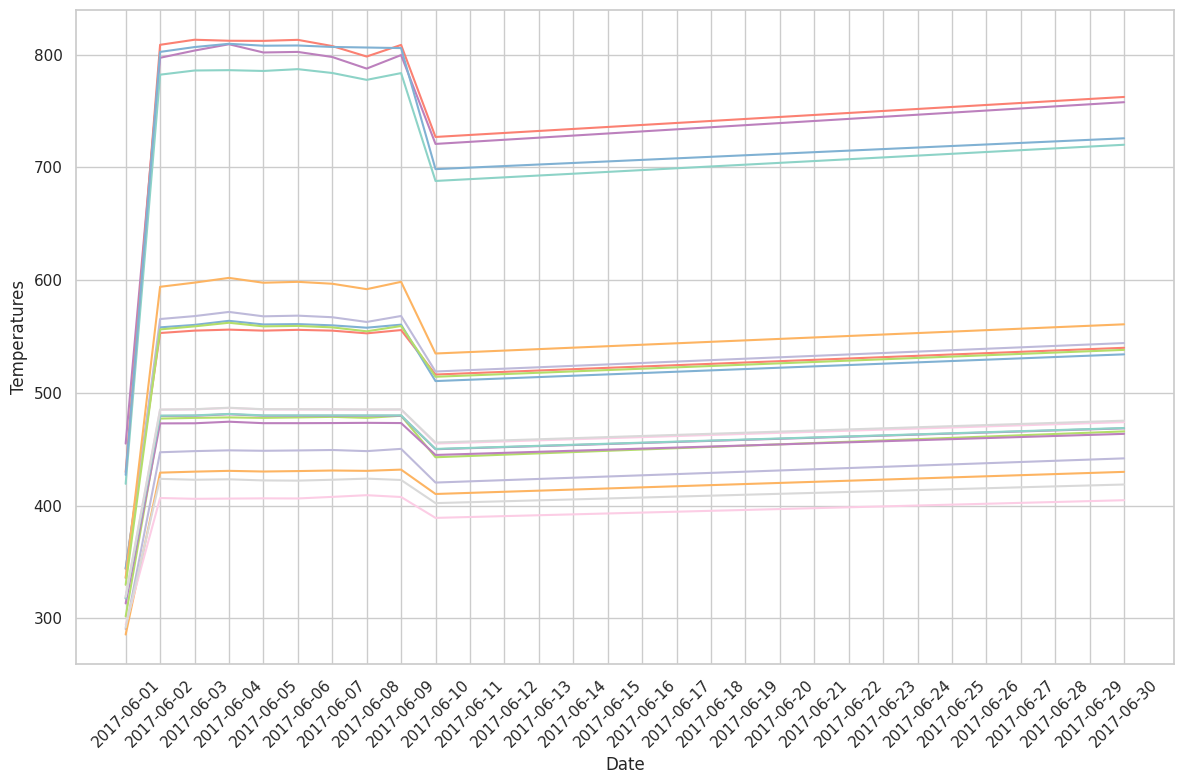

In [11]:
filtered_df3 = df1[(df1['Year']  == 2017) & (df1['Month'] >= 6) & (df1['Month'] < 7)]
plt.figure(figsize=(12, 8))

columns_to_plot = filtered_df3.columns[1:20]

for col in columns_to_plot:
    sns.lineplot(data=filtered_df3, x=df1['Date'], y=col)

plt.xticks(ticks=filtered_df3['Date'], rotation=45)
plt.ylabel("Temperatures")
plt.tight_layout()
plt.show()

### **4. Plot Maret hingga Mei 2017**

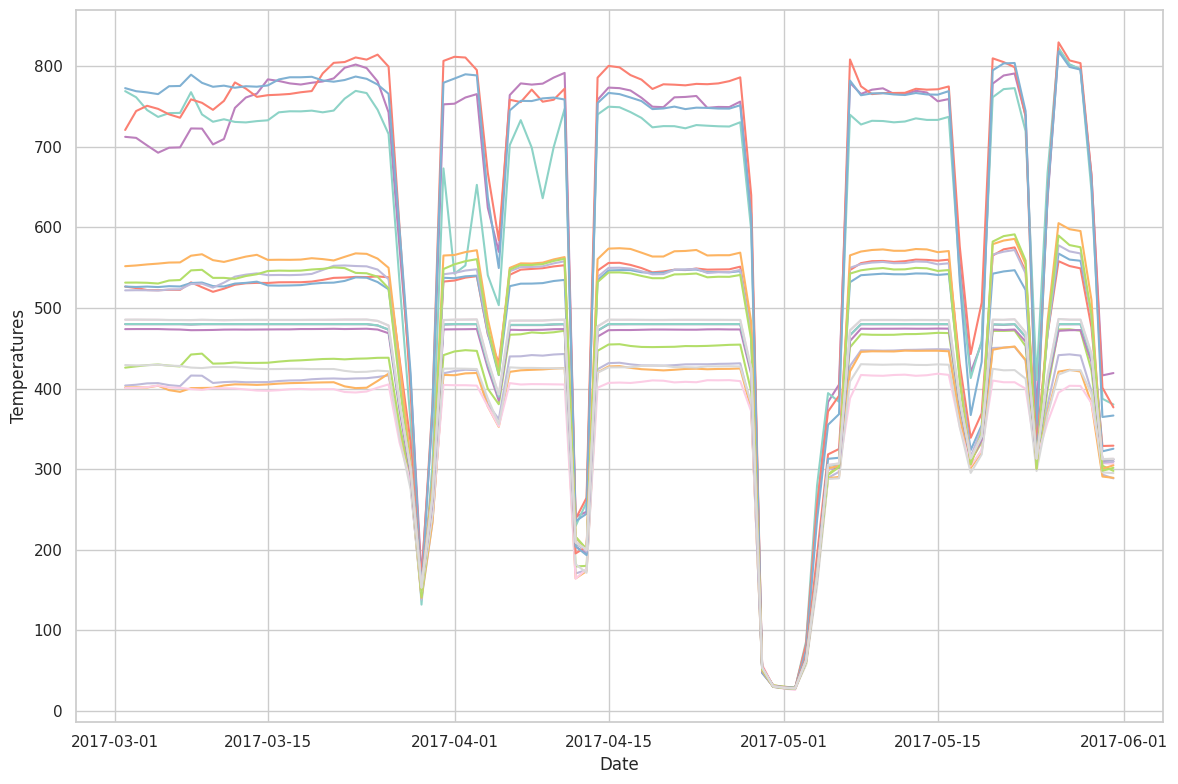

In [12]:
filtered_df2 = df1[(df1['Year']  == 2017) & (df1['Month'] >= 3) & (df1['Month'] <= 5)]
plt.figure(figsize=(12, 8))

columns_to_plot = filtered_df2.columns[1:20]

for col in columns_to_plot:
    sns.lineplot(data=filtered_df2, x=df1['Date'], y=col)

plt.ylabel("Temperatures")
plt.tight_layout()
plt.show()

## **2. Cek Missing Value**

In [13]:
df1[df1['Year']==2016].isnull().sum()

Date             0
TI12145.pv      76
TI12146.pv      56
TI12147.pv      56
TI12148.pv      72
TI12141.pv       5
TI12142.pv      34
TI12152.pv       5
TI12101.pv      79
TI12102.pv      78
TI12103.pv      75
TI12105.pv      59
TIC12105.pv     38
TI12106.pv      55
TI12107.pv      51
TI12108.pv     168
TI12109.pv     163
TI12110.pv      59
TI12150A.pv    185
TI12150B.pv    185
Year             0
Month            0
Day              0
dtype: int64

In [14]:
df1[df1['Year']==2017].isnull().sum()

Date            0
TI12145.pv      1
TI12146.pv      0
TI12147.pv      0
TI12148.pv      1
TI12141.pv      0
TI12142.pv      8
TI12152.pv      0
TI12101.pv      0
TI12102.pv      0
TI12103.pv      0
TI12105.pv      0
TIC12105.pv     0
TI12106.pv      0
TI12107.pv      0
TI12108.pv      0
TI12109.pv      0
TI12110.pv      0
TI12150A.pv    29
TI12150B.pv    29
Year            0
Month           0
Day             0
dtype: int64

In [15]:
filtered_df3.isnull().sum()

Date           0
TI12145.pv     0
TI12146.pv     0
TI12147.pv     0
TI12148.pv     1
TI12141.pv     0
TI12142.pv     0
TI12152.pv     0
TI12101.pv     0
TI12102.pv     0
TI12103.pv     0
TI12105.pv     0
TIC12105.pv    0
TI12106.pv     0
TI12107.pv     0
TI12108.pv     0
TI12109.pv     0
TI12110.pv     0
TI12150A.pv    0
TI12150B.pv    0
Year           0
Month          0
Day            0
dtype: int64

In [16]:
# Maret-Mei 2017
filtered_df2.isnull().sum()

Date           0
TI12145.pv     0
TI12146.pv     0
TI12147.pv     0
TI12148.pv     0
TI12141.pv     0
TI12142.pv     0
TI12152.pv     0
TI12101.pv     0
TI12102.pv     0
TI12103.pv     0
TI12105.pv     0
TIC12105.pv    0
TI12106.pv     0
TI12107.pv     0
TI12108.pv     0
TI12109.pv     0
TI12110.pv     0
TI12150A.pv    0
TI12150B.pv    0
Year           0
Month          0
Day            0
dtype: int64

In [17]:
# Februari 2017
filtered_df1.isnull().sum()

Date           0
TI12145.pv     0
TI12146.pv     0
TI12147.pv     0
TI12148.pv     0
TI12141.pv     0
TI12142.pv     4
TI12152.pv     0
TI12101.pv     0
TI12102.pv     0
TI12103.pv     0
TI12105.pv     0
TIC12105.pv    0
TI12106.pv     0
TI12107.pv     0
TI12108.pv     0
TI12109.pv     0
TI12110.pv     0
TI12150A.pv    0
TI12150B.pv    0
Year           0
Month          0
Day            0
dtype: int64

In [18]:
final_df1 = df1[(df1['Date'] >= '2017-02-15') & (df1['Date'] <= '2017-06-09')]
final_df1.isnull().sum()

Date           0
TI12145.pv     0
TI12146.pv     0
TI12147.pv     0
TI12148.pv     1
TI12141.pv     0
TI12142.pv     0
TI12152.pv     0
TI12101.pv     0
TI12102.pv     0
TI12103.pv     0
TI12105.pv     0
TIC12105.pv    0
TI12106.pv     0
TI12107.pv     0
TI12108.pv     0
TI12109.pv     0
TI12110.pv     0
TI12150A.pv    0
TI12150B.pv    0
Year           0
Month          0
Day            0
dtype: int64

In [19]:
final_df1= final_df1.ffill()

In [20]:
final_df1.isnull().sum()

Date           0
TI12145.pv     0
TI12146.pv     0
TI12147.pv     0
TI12148.pv     0
TI12141.pv     0
TI12142.pv     0
TI12152.pv     0
TI12101.pv     0
TI12102.pv     0
TI12103.pv     0
TI12105.pv     0
TIC12105.pv    0
TI12106.pv     0
TI12107.pv     0
TI12108.pv     0
TI12109.pv     0
TI12110.pv     0
TI12150A.pv    0
TI12150B.pv    0
Year           0
Month          0
Day            0
dtype: int64

In [21]:
final_df1 = final_df1.drop(columns=['Year','Month','Day'])

In [22]:
final_df1.head()

,Date,TI12145.pv,TI12146.pv,TI12147.pv,TI12148.pv,TI12141.pv,TI12142.pv,TI12152.pv,TI12101.pv,TI12102.pv,TI12103.pv,TI12105.pv,TIC12105.pv,TI12106.pv,TI12107.pv,TI12108.pv,TI12109.pv,TI12110.pv,TI12150A.pv,TI12150B.pv
230,2017-02-15 23:00:00,27.8,26.4,28.6,27.3,28.4,28.1,28.2,26.5,26.4,26.3,27.3,27.1,26.8,26.9,26.0,26.6,26.2,27.0,27.1
231,2017-02-16 23:00:00,27.9,26.6,28.8,27.3,28.2,28.2,28.3,26.8,26.6,26.6,27.6,27.4,28.7,27.0,26.2,26.8,26.4,27.2,27.5
232,2017-02-17 23:00:00,27.8,26.6,28.5,27.3,28.0,28.3,28.1,26.8,26.5,26.5,27.5,27.4,28.5,27.0,26.3,26.7,26.5,27.3,27.6
233,2017-02-18 23:00:00,27.9,26.8,28.6,27.5,28.2,28.4,28.3,26.9,26.7,26.7,27.7,27.6,28.4,27.1,26.4,26.9,26.6,27.4,27.8
234,2017-02-19 23:00:00,63.5,63.6,52.7,63.0,54.2,53.9,54.7,57.5,52.2,53.8,55.7,55.6,43.7,59.2,31.9,54.9,53.0,53.8,30.3


In [23]:
df1_final_drop = final_df1.drop(columns=['Date'])
df1_final_drop.corr()

,TI12145.pv,TI12146.pv,TI12147.pv,TI12148.pv,TI12141.pv,TI12142.pv,TI12152.pv,TI12101.pv,TI12102.pv,TI12103.pv,TI12105.pv,TIC12105.pv,TI12106.pv,TI12107.pv,TI12108.pv,TI12109.pv,TI12110.pv,TI12150A.pv,TI12150B.pv
TI12145.pv,1.000000,0.983754,0.996863,0.993413,0.981403,0.976187,0.986129,0.962384,0.981056,0.987447,0.987720,0.987754,0.991402,0.993329,0.996475,0.996225,0.995544,0.988415,0.987879
TI12146.pv,0.983754,1.000000,0.981611,0.987135,0.972350,0.968871,0.975909,0.958302,0.975500,0.980079,0.980534,0.980556,0.983624,0.985274,0.984849,0.986817,0.985165,0.980902,0.980277
TI12147.pv,0.996863,0.981611,1.000000,0.994726,0.977634,0.972891,0.982852,0.959536,0.980425,0.987197,0.987379,0.987410,0.989585,0.992850,0.995069,0.996536,0.994848,0.988197,0.987630
TI12148.pv,0.993413,0.987135,0.994726,1.000000,0.974656,0.971429,0.979634,0.959389,0.980973,0.987174,0.987529,0.987557,0.989176,0.991855,0.993280,0.995781,0.995495,0.988242,0.987511
TI12141.pv,0.981403,0.972350,0.977634,0.974656,1.000000,0.998376,0.999186,0.992490,0.990029,0.989644,0.990926,0.990938,0.995416,0.992453,0.990497,0.985256,0.986295,0.990038,0.989459
TI12142.pv,0.976187,0.968871,0.972891,0.971429,0.998376,1.000000,0.995873,0.994915,0.989809,0.988176,0.989532,0.989535,0.994706,0.989510,0.987049,0.980901,0.982684,0.988449,0.987978
TI12152.pv,0.986129,0.975909,0.982852,0.979634,0.999186,0.995873,1.000000,0.988989,0.990886,0.991695,0.992760,0.992779,0.996078,0.995047,0.993596,0.989457,0.990129,0.992165,0.991527
TI12101.pv,0.962384,0.958302,0.959536,0.959389,0.992490,0.994915,0.988989,1.000000,0.988798,0.984768,0.986694,0.986671,0.986582,0.982579,0.976690,0.969700,0.971474,0.984889,0.984336
TI12102.pv,0.981056,0.975500,0.980425,0.980973,0.990029,0.989809,0.990886,0.988798,1.000000,0.998982,0.998764,0.998759,0.992967,0.992941,0.990036,0.987119,0.989438,0.998607,0.998430
TI12103.pv,0.987447,0.980079,0.987197,0.987174,0.989644,0.988176,0.991695,0.984768,0.998982,1.000000,0.999803,0.999804,0.994838,0.995928,0.994358,0.992462,0.994117,0.999914,0.999719


# **2. F P %O2**

In [24]:
# -F P %O2: Has 19 different variables, from Flows, Pressures and concentration of oxygen across the oven.
df2 = data.parse('F P %O2')
df2.head()

,Date,FIC12101.pv,FIC12102.pv,FIC12103.pv,FIC12104.pv,FIC12107.pv,FIC12108.pv,FIC12109.pv,FIC12110.pv,FIC12122.pv,FIC12123.pv,AI12101.pv,AI12102.pv,AI12103.pv,AI12104.pv,AI12107A.pv,AI12107B.pv,PI12116.pv,PI12117.pv
0,2016-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-03,837.6,798.8,787.4,788.5,17.41,17.38,12.38,17.62,NaN,0.0,20.05,NaN,NaN,2.56,NaN,NaN,NaN,-12.42
3,2016-07-04,843.1,799.7,786.7,785.7,17.32,17.18,12.34,17.53,NaN,0.0,20.05,NaN,NaN,2.69,NaN,NaN,NaN,-12.44
4,2016-07-05,849.9,799.9,796.3,785.8,17.34,17.07,12.32,17.51,NaN,0.0,20.05,NaN,NaN,2.61,NaN,NaN,NaN,-12.52


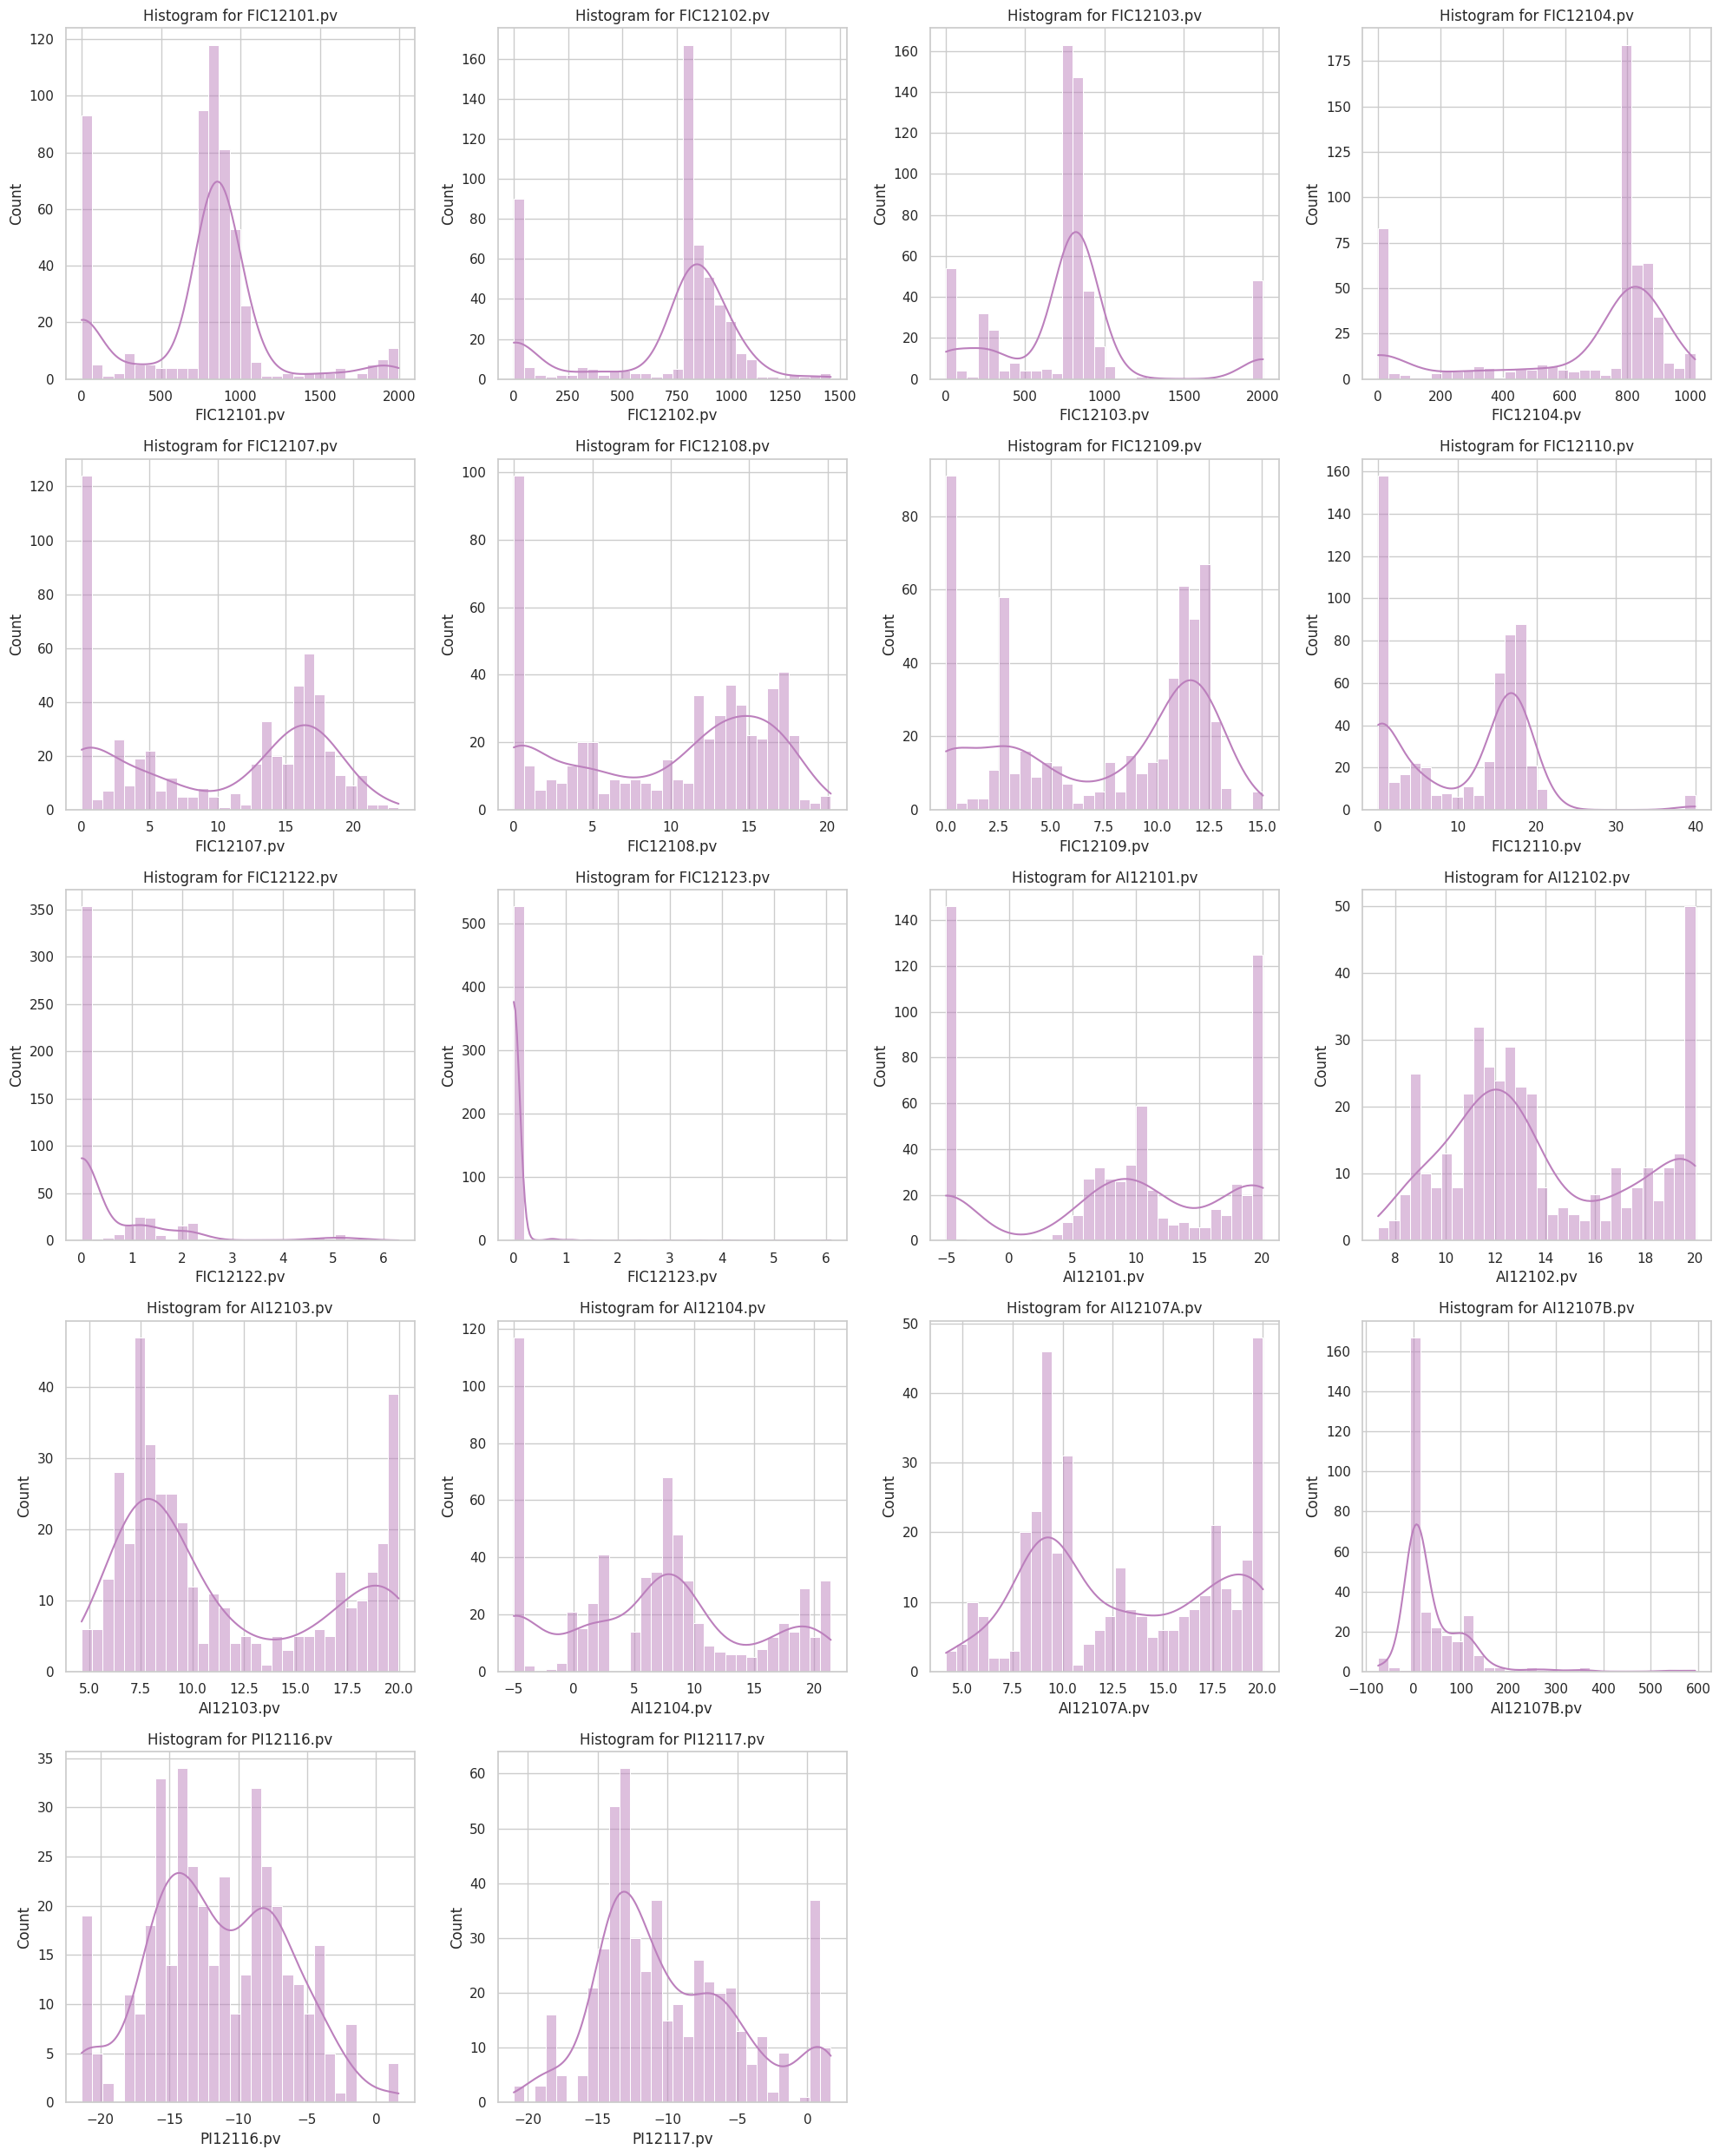

In [25]:
columns_to_plot = [col for col in df2.columns if col != 'Date']
n_cols = 4
n_rows = -(-len(columns_to_plot) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot) :
    sns.histplot(data=df2, x=column, kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [26]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Year'] = df2['Date'].dt.year
df2['Month'] = df2['Date'].dt.month
df2['Day'] = df2['Date'].dt.day

df2.head()

,Date,FIC12101.pv,FIC12102.pv,FIC12103.pv,FIC12104.pv,FIC12107.pv,FIC12108.pv,FIC12109.pv,FIC12110.pv,FIC12122.pv,...,AI12102.pv,AI12103.pv,AI12104.pv,AI12107A.pv,AI12107B.pv,PI12116.pv,PI12117.pv,Year,Month,Day
0,2016-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,7,1
1,2016-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,7,2
2,2016-07-03,837.6,798.8,787.4,788.5,17.41,17.38,12.38,17.62,NaN,...,NaN,NaN,2.56,NaN,NaN,NaN,-12.42,2016,7,3
3,2016-07-04,843.1,799.7,786.7,785.7,17.32,17.18,12.34,17.53,NaN,...,NaN,NaN,2.69,NaN,NaN,NaN,-12.44,2016,7,4
4,2016-07-05,849.9,799.9,796.3,785.8,17.34,17.07,12.32,17.51,NaN,...,NaN,NaN,2.61,NaN,NaN,NaN,-12.52,2016,7,5


In [27]:
df2.columns

Index(['Date', 'FIC12101.pv', 'FIC12102.pv', 'FIC12103.pv', 'FIC12104.pv',
       'FIC12107.pv', 'FIC12108.pv', 'FIC12109.pv', 'FIC12110.pv',
       'FIC12122.pv', 'FIC12123.pv', 'AI12101.pv', 'AI12102.pv', 'AI12103.pv',
       'AI12104.pv', 'AI12107A.pv', 'AI12107B.pv', 'PI12116.pv', 'PI12117.pv',
       'Year', 'Month', 'Day'],
      dtype='object')

## 1. Plot Flow Time Series

In [28]:
df2.columns[1:11]

Index(['FIC12101.pv', 'FIC12102.pv', 'FIC12103.pv', 'FIC12104.pv',
       'FIC12107.pv', 'FIC12108.pv', 'FIC12109.pv', 'FIC12110.pv',
       'FIC12122.pv', 'FIC12123.pv'],
      dtype='object')

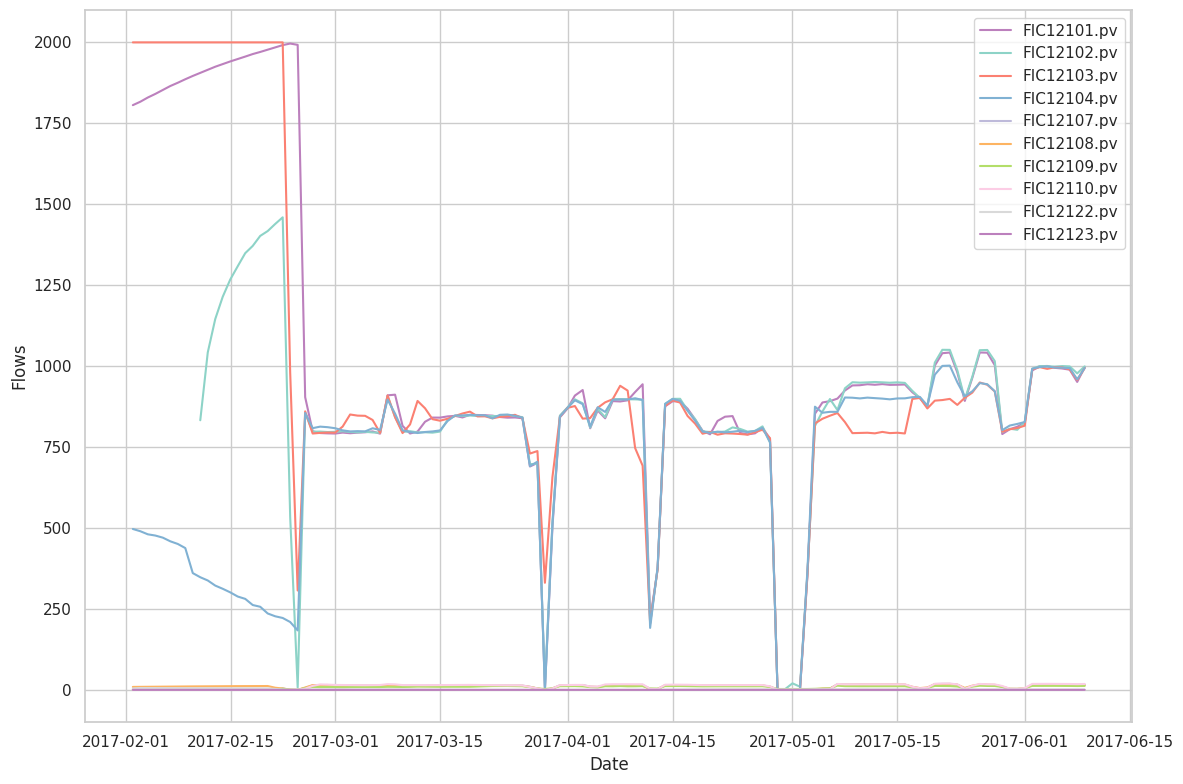

In [29]:
filter_df1 = df2[(df2['Year'] == 2017) & (df2['Month'] >= 2) & (df2['Month'] <= 6)]
plt.figure(figsize=(12, 8))

columns_to_plot1 = filter_df1.columns[1:11]

for col in columns_to_plot1:
    sns.lineplot(data=filter_df1, x=df2['Date'], y=col, label=col)

plt.ylabel("Flows")
plt.tight_layout()
plt.show()

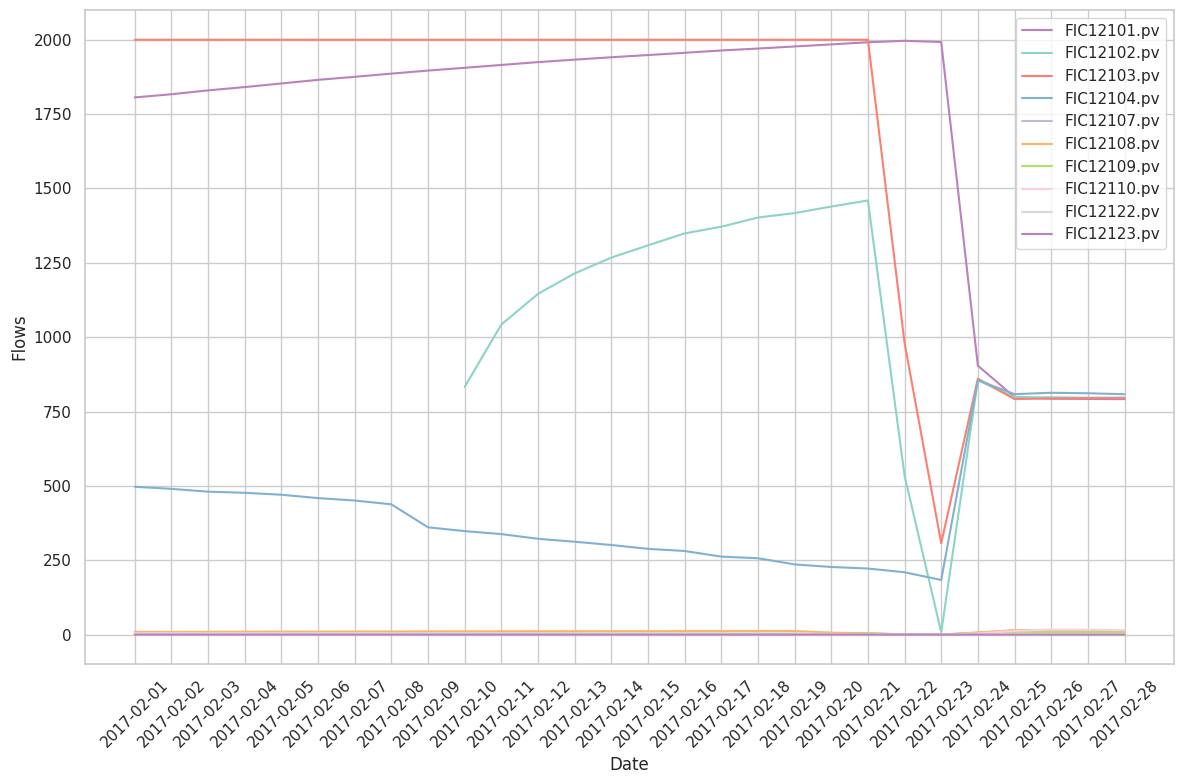

In [30]:
filter_df2 = df2[(df2['Year'] == 2017) & (df2['Month'] >= 2) & (df2['Month'] <3)]
plt.figure(figsize=(12, 8))

columns_to_plot1 = filter_df2.columns[1:11]

for col in columns_to_plot1:
    sns.lineplot(data=filter_df2, x=df2['Date'], y=col, label=col)

plt.xticks(ticks=filter_df2['Date'], rotation=45)
plt.ylabel("Flows")
plt.tight_layout()
plt.show()

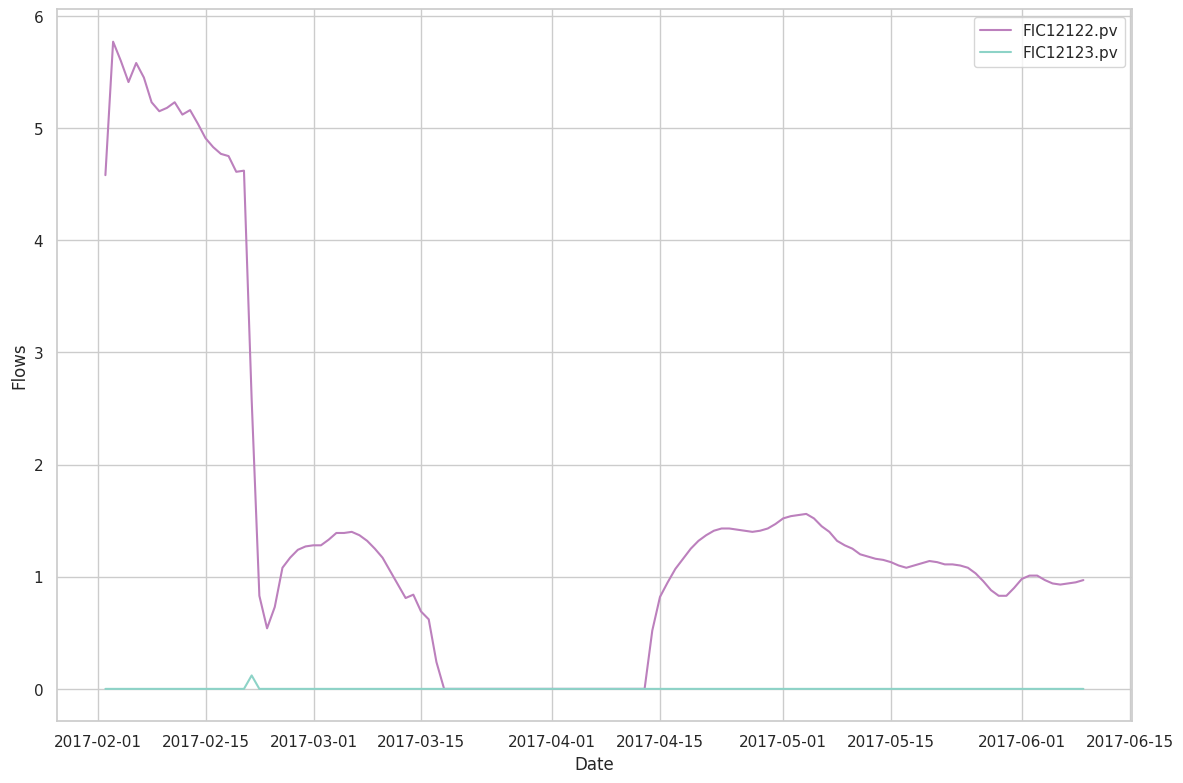

In [31]:
filter_df2 = df2[(df2['Year'] == 2017) & (df2['Month'] >= 2) & (df2['Month'] <=6)]
plt.figure(figsize=(12,8))

columns_to_plot1 = filter_df2.columns[9:11]

for col in columns_to_plot1:
    sns.lineplot(data=filter_df2, x=df2['Date'], y=col, label=col)

plt.ylabel("Flows")
plt.tight_layout()
plt.show()

'FIC12123.pv' flows nya tetap

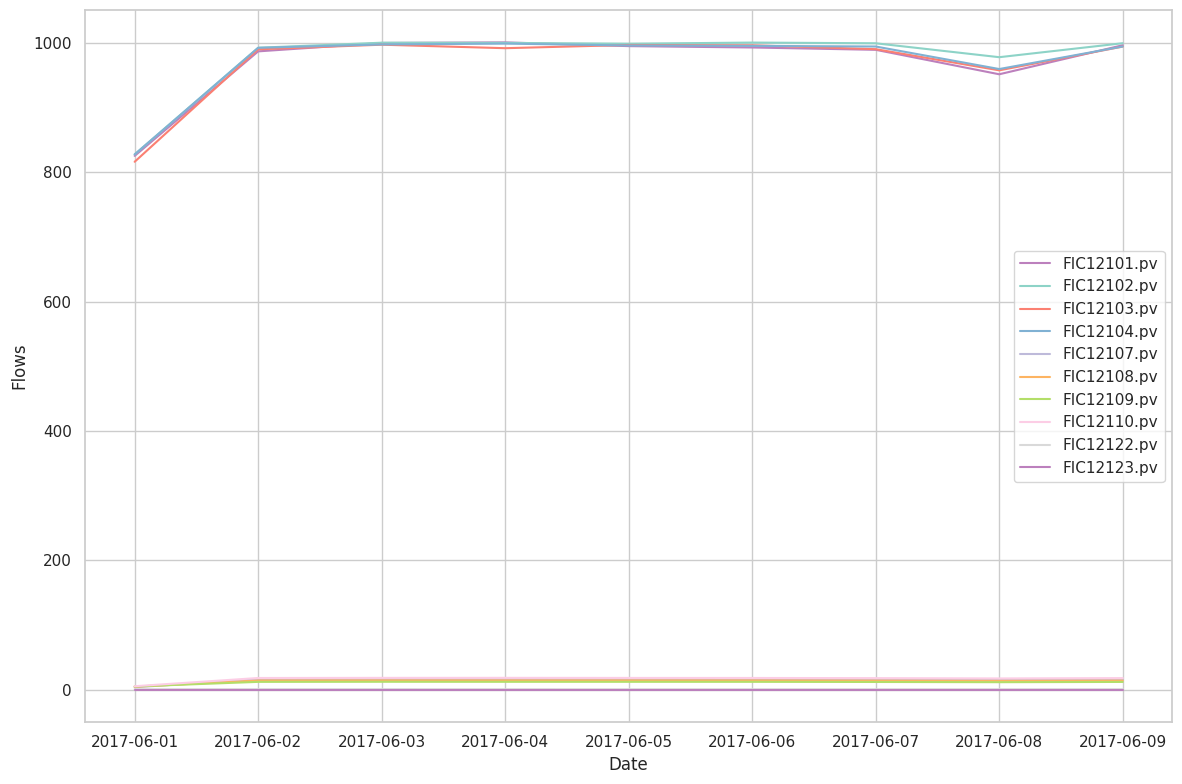

In [32]:
filter_df3 = df2[(df2['Year'] == 2017) & (df2['Month'] >= 6) & (df2['Month'] <7)]
plt.figure(figsize=(12, 8))

columns_to_plot1 = filter_df3.columns[1:11]

for col in columns_to_plot1:
    sns.lineplot(data=filter_df3, x=df2['Date'], y=col, label=col)

plt.ylabel("Flows")
plt.tight_layout()
plt.show()

## 2. Plot O2 Time Series

In [33]:
df2.columns[11:17]

Index(['AI12101.pv', 'AI12102.pv', 'AI12103.pv', 'AI12104.pv', 'AI12107A.pv',
       'AI12107B.pv'],
      dtype='object')

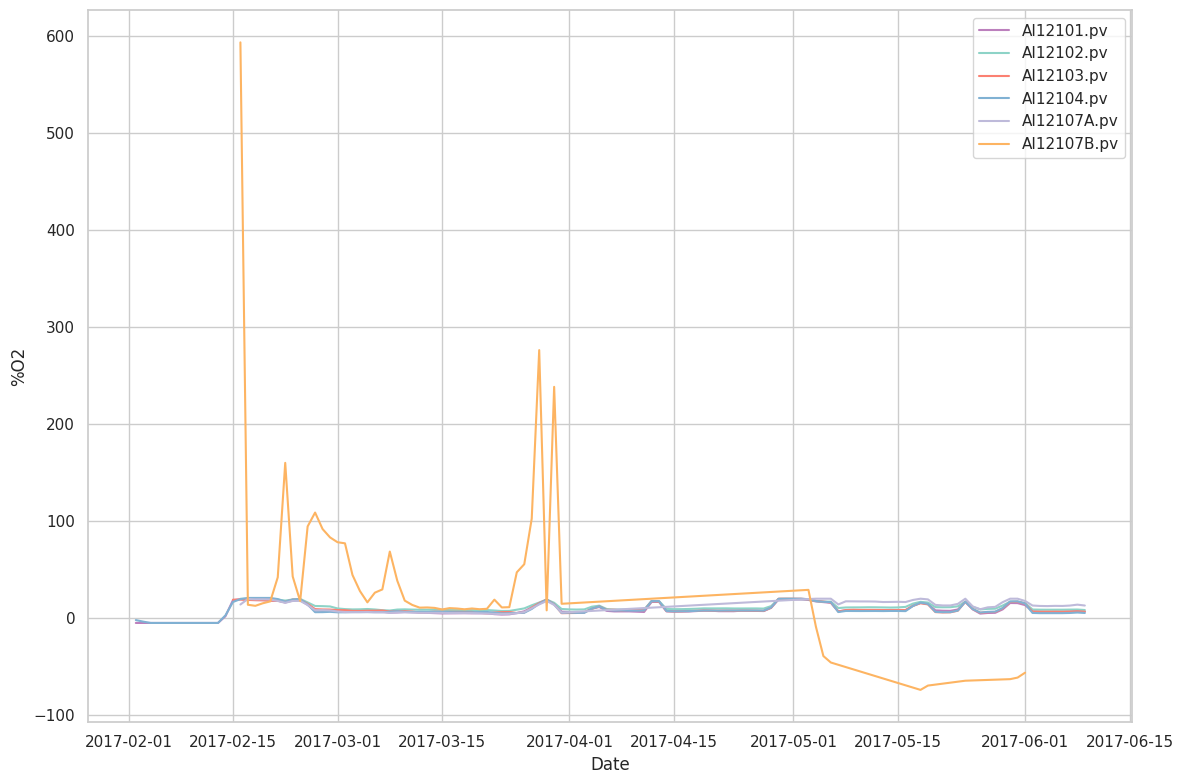

In [34]:
filter_df1 = df2[(df2['Year'] == 2017) & (df2['Month'] >= 2) & (df2['Month'] <=6)]
plt.figure(figsize=(12, 8))

columns_to_plot1 = filter_df1.columns[11:17]

for col in columns_to_plot1:
    sns.lineplot(data=filter_df1, x=df2['Date'], y=col, label=col)

plt.ylabel("%O2")
plt.tight_layout()
plt.show()

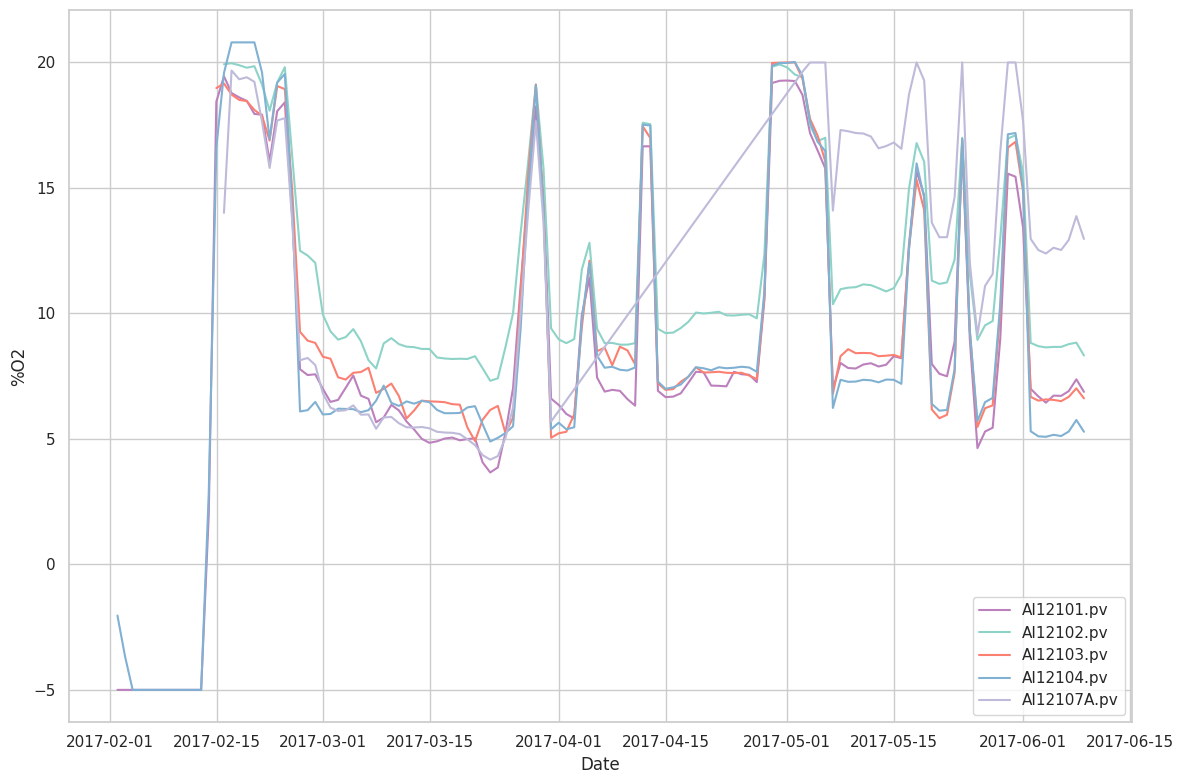

In [35]:
filter_df2 = df2[(df2['Year'] == 2017) & (df2['Month'] >= 2) & (df2['Month'] <=6)]
plt.figure(figsize=(12, 8))

columns_to_plot1 = filter_df2.columns[11:16]

for col in columns_to_plot1:
    sns.lineplot(data=filter_df2, x=df2['Date'], y=col, label=col)

plt.ylabel("%O2")
plt.tight_layout()
plt.show()

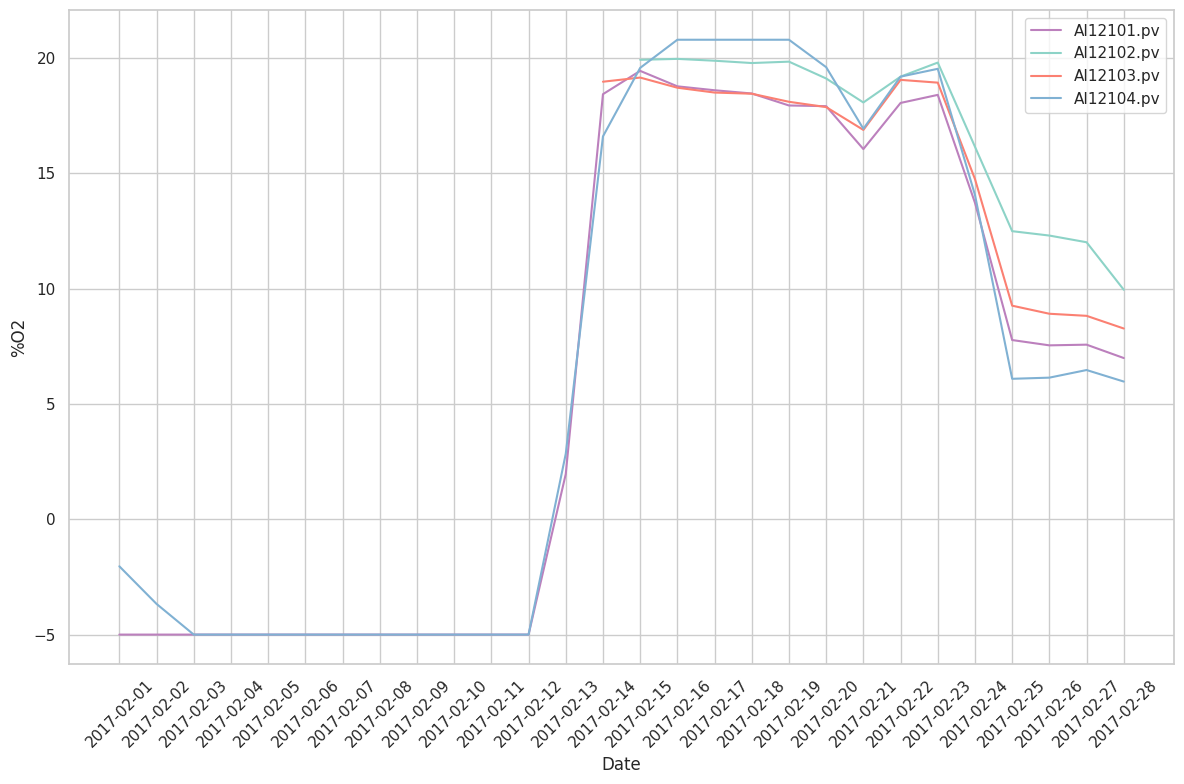

In [36]:
filter_df3 = df2[(df2['Year'] == 2017) & (df2['Month'] >= 2) & (df2['Month'] <3)]
plt.figure(figsize=(12, 8))

columns_to_plot1 = filter_df3.columns[11:15]

for col in columns_to_plot1:
    sns.lineplot(data=filter_df3, x=df2['Date'], y=col, label=col)

plt.xticks(ticks=filter_df3['Date'], rotation=45)
plt.ylabel("%O2")
plt.tight_layout()
plt.show()

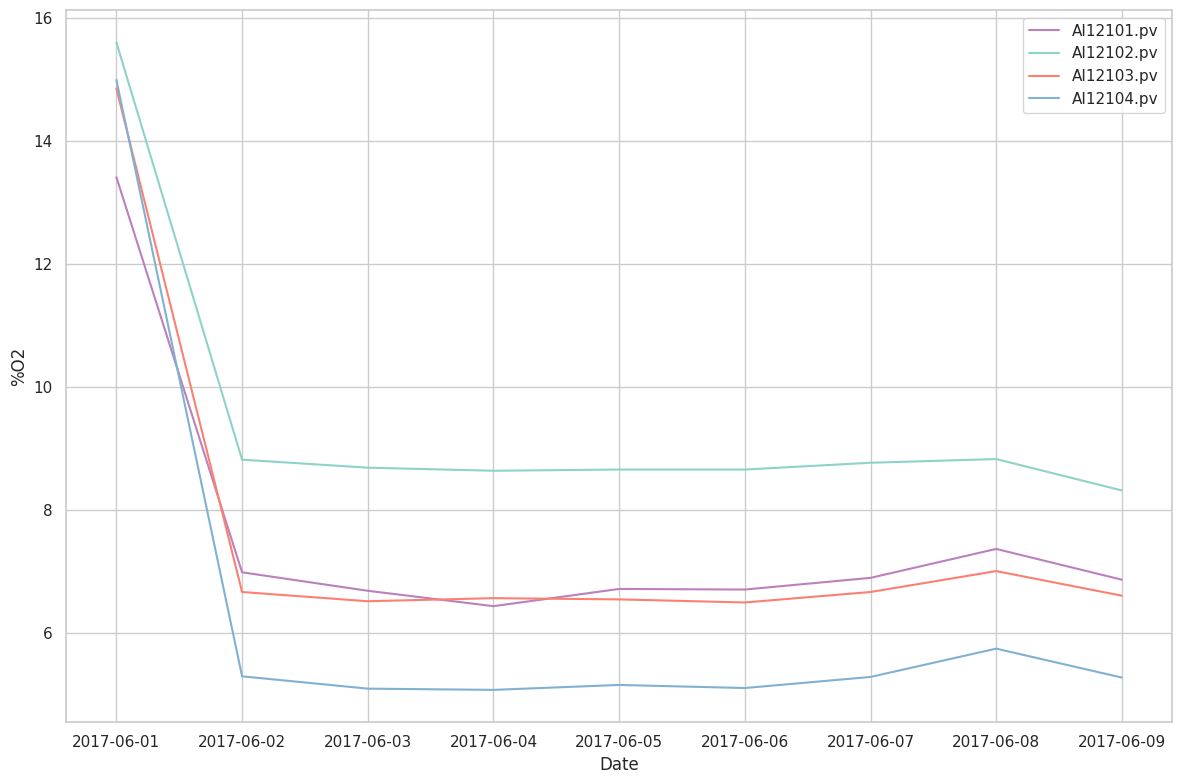

In [37]:
filter_df3 = df2[(df2['Year'] == 2017) & (df2['Month'] >= 6) & (df2['Month'] <7)]
plt.figure(figsize=(12, 8))

columns_to_plot1 = filter_df3.columns[11:15]

for col in columns_to_plot1:
    sns.lineplot(data=filter_df3, x=df2['Date'], y=col, label=col)

plt.ylabel("%O2")
plt.tight_layout()
plt.show()

## 3. Plot Pressure Time Series

In [38]:
df2.columns[17:19]

Index(['PI12116.pv', 'PI12117.pv'], dtype='object')

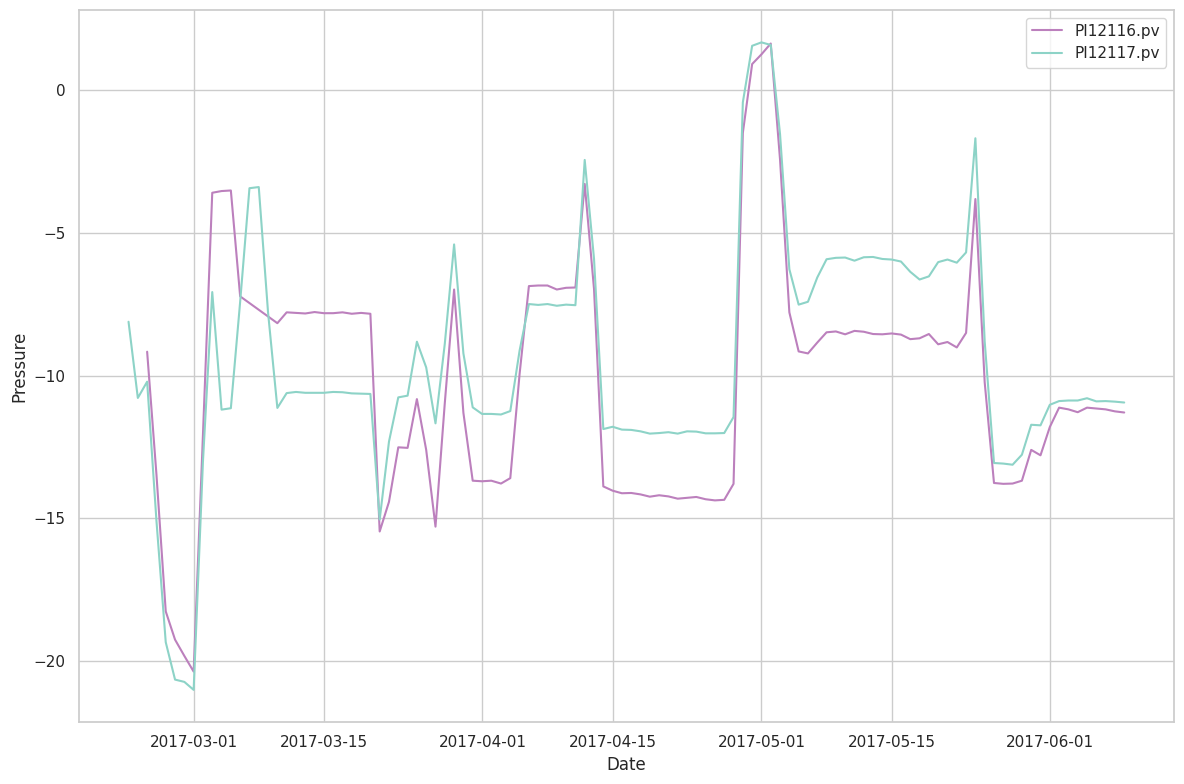

In [39]:
filter_df2 = df2[(df2['Year'] == 2017) & (df2['Month'] >= 2) & (df2['Month'] <=6)]
plt.figure(figsize=(12, 8))

columns_to_plot1 = filter_df2.columns[17:19]

for col in columns_to_plot1:
    sns.lineplot(data=filter_df2, x=df2['Date'], y=col, label=col)

plt.ylabel("Pressure")
plt.tight_layout()
plt.show()

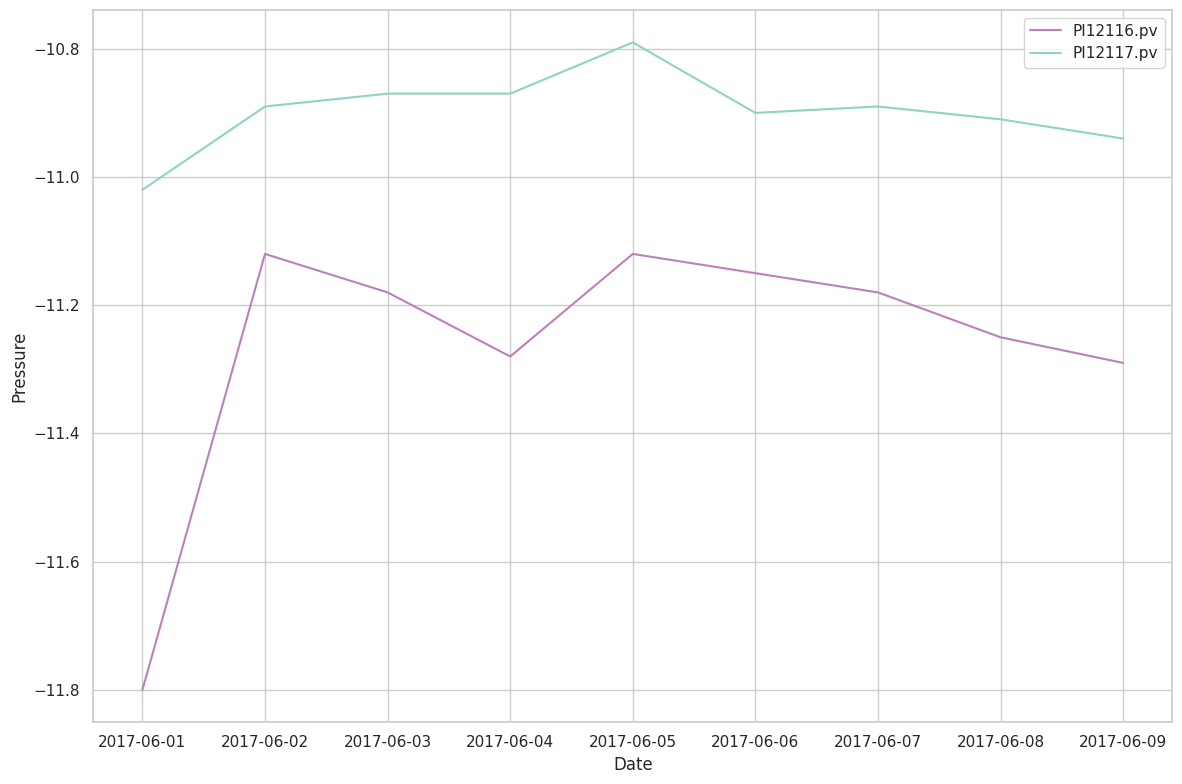

In [40]:
filter_df3 = df2[(df2['Year'] == 2017) & (df2['Month'] >= 6) & (df2['Month'] <7)]
plt.figure(figsize=(12, 8))

columns_to_plot1 = filter_df3.columns[17:19]

for col in columns_to_plot1:
    sns.lineplot(data=filter_df3, x=df2['Date'], y=col, label=col)

plt.ylabel("Pressure")
plt.tight_layout()
plt.show()

###  Final Dataset : 15th February to 9th June 2017

In [41]:
final_df2 = filter_df2[(filter_df2['Date'] >= '2017-02-15') & (filter_df2['Date'] <= '2017-06-09')]
final_df2.isnull().sum()

Date            0
FIC12101.pv     0
FIC12102.pv     0
FIC12103.pv     0
FIC12104.pv     0
FIC12107.pv     0
FIC12108.pv     0
FIC12109.pv     0
FIC12110.pv     0
FIC12122.pv     0
FIC12123.pv     0
AI12101.pv      0
AI12102.pv      0
AI12103.pv      0
AI12104.pv      0
AI12107A.pv    32
AI12107B.pv    60
PI12116.pv     11
PI12117.pv      6
Year            0
Month           0
Day             0
dtype: int64

In [42]:
final_df2.head()

,Date,FIC12101.pv,FIC12102.pv,FIC12103.pv,FIC12104.pv,FIC12107.pv,FIC12108.pv,FIC12109.pv,FIC12110.pv,FIC12122.pv,...,AI12102.pv,AI12103.pv,AI12104.pv,AI12107A.pv,AI12107B.pv,PI12116.pv,PI12117.pv,Year,Month,Day
230,2017-02-15 23:00:00,1948.5,1308.6,2000.0,288.3,0.0,11.56,0.00,0.0,4.83,...,19.92,19.15,19.57,14.00,593.42,NaN,NaN,2017,2,15
231,2017-02-16 23:00:00,1956.1,1348.9,2000.0,281.1,0.0,11.72,0.00,0.0,4.77,...,19.96,18.71,20.79,19.67,13.75,NaN,NaN,2017,2,16
232,2017-02-17 23:00:00,1963.9,1371.3,2000.0,262.1,0.0,11.87,0.13,0.0,4.75,...,19.88,18.50,20.79,19.32,12.66,NaN,NaN,2017,2,17
233,2017-02-18 23:00:00,1970.4,1402.2,2000.0,256.7,0.0,12.09,0.26,0.0,4.61,...,19.78,18.45,20.79,19.40,15.29,NaN,NaN,2017,2,18
234,2017-02-19 23:00:00,1977.4,1417.2,2000.0,236.0,0.0,11.86,0.00,0.0,4.62,...,19.84,18.10,20.79,19.22,17.24,NaN,NaN,2017,2,19


In [43]:
final_df2_drop = final_df2.drop(columns=['AI12107B.pv','Year','Month','Day'])

In [44]:
final_df2_drop.ffill(inplace=True)

In [45]:
final_df2_drop.isnull().sum()

Date           0
FIC12101.pv    0
FIC12102.pv    0
FIC12103.pv    0
FIC12104.pv    0
FIC12107.pv    0
FIC12108.pv    0
FIC12109.pv    0
FIC12110.pv    0
FIC12122.pv    0
FIC12123.pv    0
AI12101.pv     0
AI12102.pv     0
AI12103.pv     0
AI12104.pv     0
AI12107A.pv    0
PI12116.pv     8
PI12117.pv     6
dtype: int64

In [46]:
# final_df2_drop2 = final_df2_drop.drop(columns=['Date'])

In [47]:
final_df2_drop.isnull().sum()

Date           0
FIC12101.pv    0
FIC12102.pv    0
FIC12103.pv    0
FIC12104.pv    0
FIC12107.pv    0
FIC12108.pv    0
FIC12109.pv    0
FIC12110.pv    0
FIC12122.pv    0
FIC12123.pv    0
AI12101.pv     0
AI12102.pv     0
AI12103.pv     0
AI12104.pv     0
AI12107A.pv    0
PI12116.pv     8
PI12117.pv     6
dtype: int64

In [48]:
final_df2_drop.head(10)

,Date,FIC12101.pv,FIC12102.pv,FIC12103.pv,FIC12104.pv,FIC12107.pv,FIC12108.pv,FIC12109.pv,FIC12110.pv,FIC12122.pv,FIC12123.pv,AI12101.pv,AI12102.pv,AI12103.pv,AI12104.pv,AI12107A.pv,PI12116.pv,PI12117.pv
230,2017-02-15 23:00:00,1948.5,1308.6,2000.0,288.3,0.00,11.56,0.00,0.00,4.83,0.00,19.44,19.92,19.15,19.57,14.00,NaN,NaN
231,2017-02-16 23:00:00,1956.1,1348.9,2000.0,281.1,0.00,11.72,0.00,0.00,4.77,0.00,18.77,19.96,18.71,20.79,19.67,NaN,NaN
232,2017-02-17 23:00:00,1963.9,1371.3,2000.0,262.1,0.00,11.87,0.13,0.00,4.75,0.00,18.60,19.88,18.50,20.79,19.32,NaN,NaN
233,2017-02-18 23:00:00,1970.4,1402.2,2000.0,256.7,0.00,12.09,0.26,0.00,4.61,0.00,18.46,19.78,18.45,20.79,19.40,NaN,NaN
234,2017-02-19 23:00:00,1977.4,1417.2,2000.0,236.0,0.00,11.86,0.00,0.00,4.62,0.00,17.94,19.84,18.10,20.79,19.22,NaN,NaN
235,2017-02-20 23:00:00,1984.3,1439.1,2000.0,227.3,0.53,6.63,1.09,0.00,2.58,0.12,17.91,19.11,17.87,19.60,17.64,NaN,NaN
236,2017-02-21 23:00:00,1991.5,1459.6,2000.0,222.1,4.50,4.22,3.50,0.00,0.83,0.00,16.05,18.07,16.88,16.93,15.79,NaN,-8.11
237,2017-02-22 23:00:00,1996.4,534.3,980.5,209.6,0.00,0.93,1.01,0.00,0.54,0.00,18.05,19.19,19.05,19.19,17.68,NaN,-10.78
238,2017-02-23 23:00:00,1992.3,7.4,306.9,183.6,0.00,0.00,0.00,0.00,0.73,0.00,18.40,19.80,18.93,19.53,17.77,-9.16,-10.21
239,2017-02-24 23:00:00,904.1,855.4,860.4,855.3,6.13,7.41,5.67,3.68,1.08,0.00,13.72,16.15,14.75,14.06,13.51,-13.46,-15.08


In [49]:
final_df2_drop.bfill(inplace=True)

In [50]:
final_df2_drop.head(10)

,Date,FIC12101.pv,FIC12102.pv,FIC12103.pv,FIC12104.pv,FIC12107.pv,FIC12108.pv,FIC12109.pv,FIC12110.pv,FIC12122.pv,FIC12123.pv,AI12101.pv,AI12102.pv,AI12103.pv,AI12104.pv,AI12107A.pv,PI12116.pv,PI12117.pv
230,2017-02-15 23:00:00,1948.5,1308.6,2000.0,288.3,0.00,11.56,0.00,0.00,4.83,0.00,19.44,19.92,19.15,19.57,14.00,-9.16,-8.11
231,2017-02-16 23:00:00,1956.1,1348.9,2000.0,281.1,0.00,11.72,0.00,0.00,4.77,0.00,18.77,19.96,18.71,20.79,19.67,-9.16,-8.11
232,2017-02-17 23:00:00,1963.9,1371.3,2000.0,262.1,0.00,11.87,0.13,0.00,4.75,0.00,18.60,19.88,18.50,20.79,19.32,-9.16,-8.11
233,2017-02-18 23:00:00,1970.4,1402.2,2000.0,256.7,0.00,12.09,0.26,0.00,4.61,0.00,18.46,19.78,18.45,20.79,19.40,-9.16,-8.11
234,2017-02-19 23:00:00,1977.4,1417.2,2000.0,236.0,0.00,11.86,0.00,0.00,4.62,0.00,17.94,19.84,18.10,20.79,19.22,-9.16,-8.11
235,2017-02-20 23:00:00,1984.3,1439.1,2000.0,227.3,0.53,6.63,1.09,0.00,2.58,0.12,17.91,19.11,17.87,19.60,17.64,-9.16,-8.11
236,2017-02-21 23:00:00,1991.5,1459.6,2000.0,222.1,4.50,4.22,3.50,0.00,0.83,0.00,16.05,18.07,16.88,16.93,15.79,-9.16,-8.11
237,2017-02-22 23:00:00,1996.4,534.3,980.5,209.6,0.00,0.93,1.01,0.00,0.54,0.00,18.05,19.19,19.05,19.19,17.68,-9.16,-10.78
238,2017-02-23 23:00:00,1992.3,7.4,306.9,183.6,0.00,0.00,0.00,0.00,0.73,0.00,18.40,19.80,18.93,19.53,17.77,-9.16,-10.21
239,2017-02-24 23:00:00,904.1,855.4,860.4,855.3,6.13,7.41,5.67,3.68,1.08,0.00,13.72,16.15,14.75,14.06,13.51,-13.46,-15.08


# **3. Joining Data**

In [51]:
df1 = pd.DataFrame(final_df1)
df2 = pd.DataFrame(final_df2_drop)

In [52]:
df = pd.merge(df1, df2, how='left', on='Date')
df

,Date,TI12145.pv,TI12146.pv,TI12147.pv,TI12148.pv,TI12141.pv,TI12142.pv,TI12152.pv,TI12101.pv,TI12102.pv,...,FIC12110.pv,FIC12122.pv,FIC12123.pv,AI12101.pv,AI12102.pv,AI12103.pv,AI12104.pv,AI12107A.pv,PI12116.pv,PI12117.pv
0,2017-02-15 23:00:00,27.8,26.4,28.6,27.3,28.4,28.1,28.2,26.5,26.4,...,0.00,4.83,0.0,19.44,19.92,19.15,19.57,14.00,-9.16,-8.11
1,2017-02-16 23:00:00,27.9,26.6,28.8,27.3,28.2,28.2,28.3,26.8,26.6,...,0.00,4.77,0.0,18.77,19.96,18.71,20.79,19.67,-9.16,-8.11
2,2017-02-17 23:00:00,27.8,26.6,28.5,27.3,28.0,28.3,28.1,26.8,26.5,...,0.00,4.75,0.0,18.60,19.88,18.50,20.79,19.32,-9.16,-8.11
3,2017-02-18 23:00:00,27.9,26.8,28.6,27.5,28.2,28.4,28.3,26.9,26.7,...,0.00,4.61,0.0,18.46,19.78,18.45,20.79,19.40,-9.16,-8.11
4,2017-02-19 23:00:00,63.5,63.6,52.7,63.0,54.2,53.9,54.7,57.5,52.2,...,0.00,4.62,0.0,17.94,19.84,18.10,20.79,19.22,-9.16,-8.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2017-06-05 00:00:00,802.0,785.6,812.3,808.0,448.6,430.2,477.8,406.4,422.3,...,18.46,0.94,0.0,6.72,8.66,6.55,5.16,12.61,-11.12,-10.79
110,2017-06-06 00:00:00,802.5,787.2,813.2,808.2,448.9,430.6,478.2,406.3,422.1,...,18.40,0.93,0.0,6.71,8.66,6.50,5.11,12.52,-11.15,-10.90
111,2017-06-07 00:00:00,798.0,783.8,807.7,806.9,449.3,431.1,478.7,407.7,422.9,...,18.15,0.94,0.0,6.90,8.77,6.67,5.29,12.92,-11.18,-10.89
112,2017-06-08 00:00:00,787.7,777.7,798.4,806.9,448.3,430.8,477.8,409.2,423.9,...,17.67,0.95,0.0,7.37,8.83,7.01,5.75,13.87,-11.25,-10.91


In [53]:
df.isnull().sum()

Date           0
TI12145.pv     0
TI12146.pv     0
TI12147.pv     0
TI12148.pv     0
TI12141.pv     0
TI12142.pv     0
TI12152.pv     0
TI12101.pv     0
TI12102.pv     0
TI12103.pv     0
TI12105.pv     0
TIC12105.pv    0
TI12106.pv     0
TI12107.pv     0
TI12108.pv     0
TI12109.pv     0
TI12110.pv     0
TI12150A.pv    0
TI12150B.pv    0
FIC12101.pv    0
FIC12102.pv    0
FIC12103.pv    0
FIC12104.pv    0
FIC12107.pv    0
FIC12108.pv    0
FIC12109.pv    0
FIC12110.pv    0
FIC12122.pv    0
FIC12123.pv    0
AI12101.pv     0
AI12102.pv     0
AI12103.pv     0
AI12104.pv     0
AI12107A.pv    0
PI12116.pv     0
PI12117.pv     0
dtype: int64

In [54]:
df.columns

Index(['Date', 'TI12145.pv', 'TI12146.pv', 'TI12147.pv', 'TI12148.pv',
       'TI12141.pv', 'TI12142.pv', 'TI12152.pv', 'TI12101.pv', 'TI12102.pv',
       'TI12103.pv', 'TI12105.pv', 'TIC12105.pv', 'TI12106.pv', 'TI12107.pv',
       'TI12108.pv', 'TI12109.pv', 'TI12110.pv', 'TI12150A.pv', 'TI12150B.pv',
       'FIC12101.pv', 'FIC12102.pv', 'FIC12103.pv', 'FIC12104.pv',
       'FIC12107.pv', 'FIC12108.pv', 'FIC12109.pv', 'FIC12110.pv',
       'FIC12122.pv', 'FIC12123.pv', 'AI12101.pv', 'AI12102.pv', 'AI12103.pv',
       'AI12104.pv', 'AI12107A.pv', 'PI12116.pv', 'PI12117.pv'],
      dtype='object')

In [55]:
data = df.drop(columns=['Date'])
data

,TI12145.pv,TI12146.pv,TI12147.pv,TI12148.pv,TI12141.pv,TI12142.pv,TI12152.pv,TI12101.pv,TI12102.pv,TI12103.pv,...,FIC12110.pv,FIC12122.pv,FIC12123.pv,AI12101.pv,AI12102.pv,AI12103.pv,AI12104.pv,AI12107A.pv,PI12116.pv,PI12117.pv
0,27.8,26.4,28.6,27.3,28.4,28.1,28.2,26.5,26.4,26.3,...,0.00,4.83,0.0,19.44,19.92,19.15,19.57,14.00,-9.16,-8.11
1,27.9,26.6,28.8,27.3,28.2,28.2,28.3,26.8,26.6,26.6,...,0.00,4.77,0.0,18.77,19.96,18.71,20.79,19.67,-9.16,-8.11
2,27.8,26.6,28.5,27.3,28.0,28.3,28.1,26.8,26.5,26.5,...,0.00,4.75,0.0,18.60,19.88,18.50,20.79,19.32,-9.16,-8.11
3,27.9,26.8,28.6,27.5,28.2,28.4,28.3,26.9,26.7,26.7,...,0.00,4.61,0.0,18.46,19.78,18.45,20.79,19.40,-9.16,-8.11
4,63.5,63.6,52.7,63.0,54.2,53.9,54.7,57.5,52.2,53.8,...,0.00,4.62,0.0,17.94,19.84,18.10,20.79,19.22,-9.16,-8.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,802.0,785.6,812.3,808.0,448.6,430.2,477.8,406.4,422.3,473.1,...,18.46,0.94,0.0,6.72,8.66,6.55,5.16,12.61,-11.12,-10.79
110,802.5,787.2,813.2,808.2,448.9,430.6,478.2,406.3,422.1,473.1,...,18.40,0.93,0.0,6.71,8.66,6.50,5.11,12.52,-11.15,-10.90
111,798.0,783.8,807.7,806.9,449.3,431.1,478.7,407.7,422.9,473.2,...,18.15,0.94,0.0,6.90,8.77,6.67,5.29,12.92,-11.18,-10.89
112,787.7,777.7,798.4,806.9,448.3,430.8,477.8,409.2,423.9,473.4,...,17.67,0.95,0.0,7.37,8.83,7.01,5.75,13.87,-11.25,-10.91


In [56]:
data.corr()

,TI12145.pv,TI12146.pv,TI12147.pv,TI12148.pv,TI12141.pv,TI12142.pv,TI12152.pv,TI12101.pv,TI12102.pv,TI12103.pv,...,FIC12110.pv,FIC12122.pv,FIC12123.pv,AI12101.pv,AI12102.pv,AI12103.pv,AI12104.pv,AI12107A.pv,PI12116.pv,PI12117.pv
TI12145.pv,1.000000,0.983754,0.996863,0.993413,0.981403,0.976187,0.986129,0.962384,0.981056,0.987447,...,0.956406,-0.508523,-0.168947,-0.964648,-0.954634,-0.965326,-0.969951,-0.440362,-0.425935,-0.450552
TI12146.pv,0.983754,1.000000,0.981611,0.987135,0.972350,0.968871,0.975909,0.958302,0.975500,0.980079,...,0.945689,-0.454662,-0.159889,-0.951986,-0.938249,-0.946953,-0.962178,-0.419942,-0.418365,-0.471454
TI12147.pv,0.996863,0.981611,1.000000,0.994726,0.977634,0.972891,0.982852,0.959536,0.980425,0.987197,...,0.955201,-0.497532,-0.164572,-0.965965,-0.957769,-0.973808,-0.976247,-0.459318,-0.432915,-0.453013
TI12148.pv,0.993413,0.987135,0.994726,1.000000,0.974656,0.971429,0.979634,0.959389,0.980973,0.987174,...,0.959525,-0.487676,-0.158752,-0.971021,-0.958811,-0.972150,-0.983465,-0.465028,-0.426636,-0.473807
TI12141.pv,0.981403,0.972350,0.977634,0.974656,1.000000,0.998376,0.999186,0.992490,0.990029,0.989644,...,0.915526,-0.525292,-0.149547,-0.906628,-0.896137,-0.911341,-0.925351,-0.348900,-0.445960,-0.454282
TI12142.pv,0.976187,0.968871,0.972891,0.971429,0.998376,1.000000,0.995873,0.994915,0.989809,0.988176,...,0.906041,-0.527291,-0.154069,-0.898663,-0.884286,-0.904785,-0.920317,-0.341333,-0.455770,-0.463549
TI12152.pv,0.986129,0.975909,0.982852,0.979634,0.999186,0.995873,1.000000,0.988989,0.990886,0.991695,...,0.925377,-0.520550,-0.149322,-0.917721,-0.908371,-0.921588,-0.934620,-0.366499,-0.443648,-0.455767
TI12101.pv,0.962384,0.958302,0.959536,0.959389,0.992490,0.994915,0.988989,1.000000,0.988798,0.984768,...,0.871049,-0.549884,-0.143398,-0.886109,-0.874123,-0.884929,-0.901819,-0.350138,-0.463801,-0.489251
TI12102.pv,0.981056,0.975500,0.980425,0.980973,0.990029,0.989809,0.990886,0.988798,1.000000,0.998982,...,0.910858,-0.530685,-0.181741,-0.926910,-0.916791,-0.923990,-0.939457,-0.412432,-0.449721,-0.486091
TI12103.pv,0.987447,0.980079,0.987197,0.987174,0.989644,0.988176,0.991695,0.984768,0.998982,1.000000,...,0.923605,-0.527932,-0.184232,-0.939989,-0.930448,-0.937822,-0.950998,-0.430532,-0.441210,-0.477278


In [57]:
data = data.drop(columns = ['FIC12122.pv', 'FIC12123.pv','AI12107A.pv'])

In [58]:
data.corrwith(data['AI12101.pv']).sort_values(ascending=False)

AI12101.pv     1.000000
AI12102.pv     0.986121
AI12103.pv     0.984848
AI12104.pv     0.980468
PI12117.pv     0.464926
PI12116.pv     0.385876
FIC12101.pv    0.128802
FIC12103.pv    0.065352
FIC12102.pv   -0.270017
FIC12104.pv   -0.773563
FIC12108.pv   -0.792556
TI12101.pv    -0.886109
TI12142.pv    -0.898663
TI12141.pv    -0.906628
TI12152.pv    -0.917721
TI12102.pv    -0.926910
FIC12109.pv   -0.927820
FIC12107.pv   -0.933988
TI12106.pv    -0.936317
TI12105.pv    -0.939881
TIC12105.pv   -0.939914
TI12103.pv    -0.939989
TI12150B.pv   -0.940898
TI12150A.pv   -0.941822
FIC12110.pv   -0.942282
TI12107.pv    -0.946533
TI12108.pv    -0.951876
TI12146.pv    -0.951986
TI12110.pv    -0.957617
TI12109.pv    -0.959062
TI12145.pv    -0.964648
TI12147.pv    -0.965965
TI12148.pv    -0.971021
dtype: float64

In [59]:
data.corrwith(data['AI12102.pv']).sort_values(ascending=False)

AI12102.pv     1.000000
AI12101.pv     0.986121
AI12103.pv     0.973295
AI12104.pv     0.970879
PI12117.pv     0.410532
PI12116.pv     0.327267
FIC12101.pv    0.159754
FIC12103.pv    0.083862
FIC12102.pv   -0.244779
FIC12108.pv   -0.756490
FIC12104.pv   -0.775688
TI12101.pv    -0.874123
TI12142.pv    -0.884286
TI12141.pv    -0.896137
TI12152.pv    -0.908371
TI12102.pv    -0.916791
FIC12107.pv   -0.920222
TI12106.pv    -0.924013
FIC12109.pv   -0.925065
TI12105.pv    -0.930132
TIC12105.pv   -0.930176
TI12103.pv    -0.930448
TI12150B.pv   -0.931749
TI12150A.pv   -0.932257
FIC12110.pv   -0.933967
TI12107.pv    -0.936227
TI12146.pv    -0.938249
TI12108.pv    -0.941150
TI12110.pv    -0.945319
TI12109.pv    -0.950529
TI12145.pv    -0.954634
TI12147.pv    -0.957769
TI12148.pv    -0.958811
dtype: float64

In [60]:
data.corrwith(data['AI12103.pv']).sort_values(ascending=False)

AI12103.pv     1.000000
AI12104.pv     0.985093
AI12101.pv     0.984848
AI12102.pv     0.973295
PI12117.pv     0.444324
PI12116.pv     0.400893
FIC12101.pv    0.101398
FIC12103.pv    0.034262
FIC12102.pv   -0.308356
FIC12104.pv   -0.791424
FIC12108.pv   -0.830473
TI12101.pv    -0.884929
TI12142.pv    -0.904785
TI12141.pv    -0.911341
TI12152.pv    -0.921588
TI12102.pv    -0.923990
TI12105.pv    -0.937579
TIC12105.pv   -0.937622
TI12103.pv    -0.937822
TI12150B.pv   -0.938594
TI12106.pv    -0.938815
TI12150A.pv   -0.939718
FIC12109.pv   -0.945938
TI12146.pv    -0.946953
TI12107.pv    -0.948009
FIC12110.pv   -0.953607
FIC12107.pv   -0.953835
TI12108.pv    -0.954137
TI12110.pv    -0.960058
TI12109.pv    -0.962487
TI12145.pv    -0.965326
TI12148.pv    -0.972150
TI12147.pv    -0.973808
dtype: float64

In [61]:
correlation = data.corrwith(data['AI12104.pv']).sort_values(ascending=False)

In [62]:
final_data = data.drop(columns=['AI12104.pv'])

In [63]:
cols_to_keep = correlation[(correlation >= -1) & (correlation <= -0.8)].index

final_data = data[cols_to_keep]

In [64]:
final_data.columns

Index(['FIC12108.pv', 'TI12101.pv', 'TI12142.pv', 'TI12141.pv', 'TI12152.pv',
       'TI12102.pv', 'FIC12109.pv', 'TI12105.pv', 'TIC12105.pv', 'TI12103.pv',
       'TI12106.pv', 'TI12150B.pv', 'TI12150A.pv', 'TI12107.pv', 'FIC12110.pv',
       'FIC12107.pv', 'TI12146.pv', 'TI12108.pv', 'TI12110.pv', 'TI12145.pv',
       'TI12109.pv', 'TI12147.pv', 'TI12148.pv'],
      dtype='object')

In [65]:
final_data.head()

,FIC12108.pv,TI12101.pv,TI12142.pv,TI12141.pv,TI12152.pv,TI12102.pv,FIC12109.pv,TI12105.pv,TIC12105.pv,TI12103.pv,...,TI12107.pv,FIC12110.pv,FIC12107.pv,TI12146.pv,TI12108.pv,TI12110.pv,TI12145.pv,TI12109.pv,TI12147.pv,TI12148.pv
0,11.56,26.5,28.1,28.4,28.2,26.4,0.00,27.3,27.1,26.3,...,26.9,0.0,0.0,26.4,26.0,26.2,27.8,26.6,28.6,27.3
1,11.72,26.8,28.2,28.2,28.3,26.6,0.00,27.6,27.4,26.6,...,27.0,0.0,0.0,26.6,26.2,26.4,27.9,26.8,28.8,27.3
2,11.87,26.8,28.3,28.0,28.1,26.5,0.13,27.5,27.4,26.5,...,27.0,0.0,0.0,26.6,26.3,26.5,27.8,26.7,28.5,27.3
3,12.09,26.9,28.4,28.2,28.3,26.7,0.26,27.7,27.6,26.7,...,27.1,0.0,0.0,26.8,26.4,26.6,27.9,26.9,28.6,27.5
4,11.86,57.5,53.9,54.2,54.7,52.2,0.00,55.7,55.6,53.8,...,59.2,0.0,0.0,63.6,31.9,53.0,63.5,54.9,52.7,63.0


# **4. PCA**

In [66]:
scaler = StandardScaler()

data_scaled = scaler.fit_transform(final_data)

In [67]:
pca = PCA()
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)

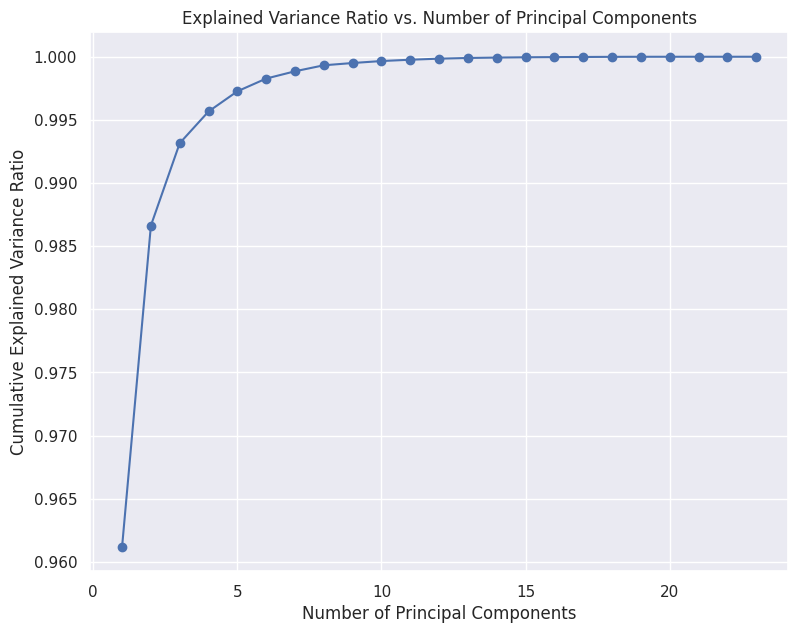

In [68]:
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

sns.set(font_scale=1)
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

In [69]:
pca = PCA(n_components=11)
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,11.562790,2.106867,-0.752829,-0.184011,-0.201087,0.009722,-0.004987,-0.055857,0.017431,0.040029,0.002127
1,11.550179,2.128309,-0.774915,-0.182315,-0.209673,0.007855,-0.005893,-0.054923,0.013334,0.038424,-0.003135
2,11.538806,2.159157,-0.773517,-0.164440,-0.230832,0.000429,-0.013806,-0.045226,0.010007,0.030956,-0.011543
3,11.520092,2.198698,-0.782081,-0.145295,-0.255996,-0.007885,-0.023706,-0.035639,0.007536,0.023056,-0.018068
4,10.896734,1.873328,-0.943938,-0.168669,-0.201763,-0.036916,-0.020677,-0.084855,0.052118,0.006853,0.036574
...,...,...,...,...,...,...,...,...,...,...,...
109,-3.339201,0.532245,0.371920,0.125887,0.155421,-0.118640,-0.062355,-0.052903,0.066422,-0.037671,0.038822
110,-3.339611,0.517994,0.366737,0.122472,0.153007,-0.129394,-0.061579,-0.059576,0.068451,-0.035964,0.037699
111,-3.287549,0.436963,0.327237,0.110337,0.160311,-0.122089,-0.061193,-0.067830,0.074277,-0.037166,0.034718
112,-3.182448,0.318264,0.255675,0.084989,0.145275,-0.116572,-0.064962,-0.073129,0.075968,-0.057203,0.025010


In [70]:
X = data_pca
y = data['AI12104.pv']

In [71]:
print(X.shape)
print(y.shape)

(114, 11)
(114,)


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **5. Modeling**

## **1. Linear Regression**

In [73]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression - R2: {lr_r2:.4f}, MSE: {lr_mse:.4f}")

Linear Regression - R2: 0.9793, MSE: 0.5389


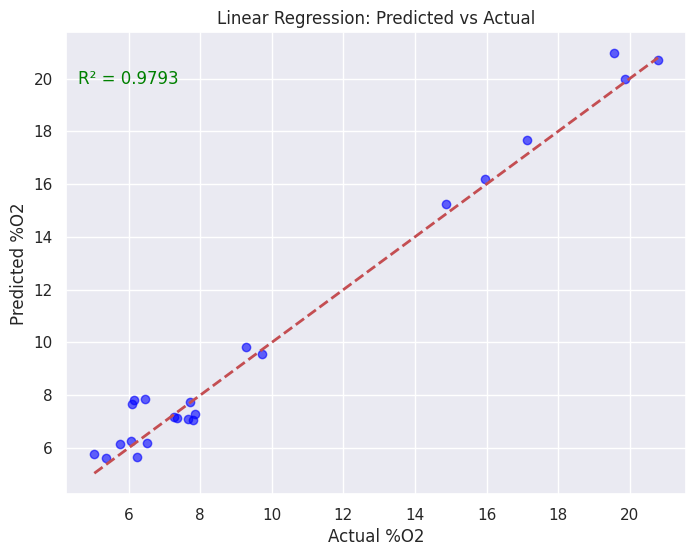

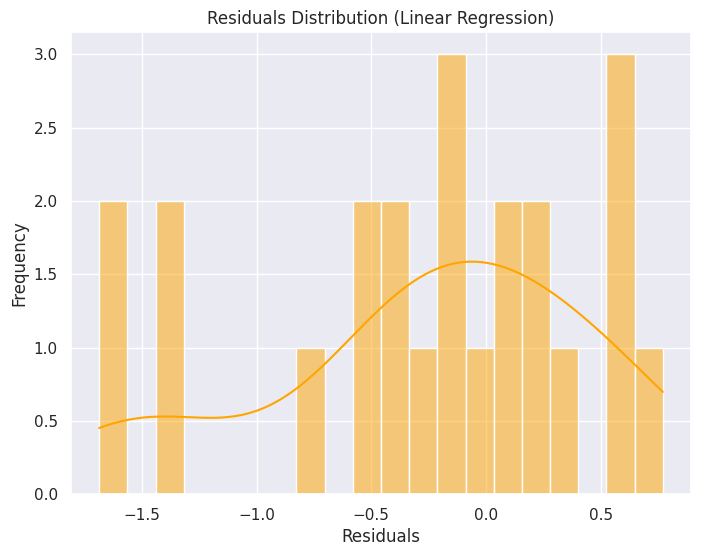

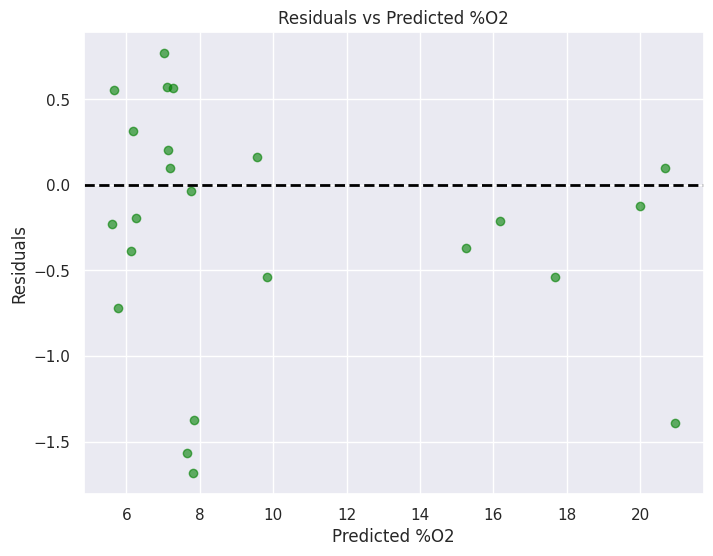

In [74]:
# 1. Scatter plot: Prediksi vs Nilai Aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line for perfect prediction
plt.text(0.1, 0.9, f'R² = {lr_r2:.4f}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='green')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual %O2')
plt.ylabel('Predicted %O2')
plt.show()

# 2. Residuals plot
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred_lr
sns.histplot(residuals, kde=True, color='orange', bins=20)
plt.title('Residuals Distribution (Linear Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 3. Residuals vs Fitted Values (Checking Homoscedasticity)
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lr, residuals, color='green', alpha=0.6)
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted %O2')
plt.xlabel('Predicted %O2')
plt.ylabel('Residuals')
plt.show()


## **2. SVR**

In [75]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
svr_r2 = r2_score(y_test, y_pred_svr)
svr_mse = mean_squared_error(y_test, y_pred_svr)
print(f"SVR - R2: {svr_r2:.4f}, MSE: {svr_mse:.4f}")

SVR - R2: 0.9707, MSE: 0.7639


In [76]:
svr = SVR()

param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
svr_best = grid_search.best_estimator_

y_pred_svr = svr_best.predict(X_test)
svr_r2 = r2_score(y_test, y_pred_svr)
svr_mse = mean_squared_error(y_test, y_pred_svr)

print(f"Best Parameters: {best_params}")
print(f"SVR - R2: {svr_r2:.4f}, MSE: {svr_mse:.4f}")


Best Parameters: {'C': 100, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}
SVR - R2: 0.9807, MSE: 0.5024


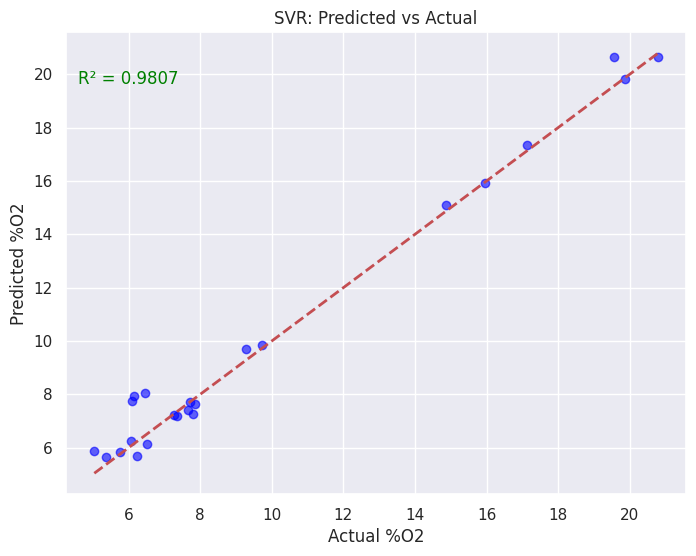

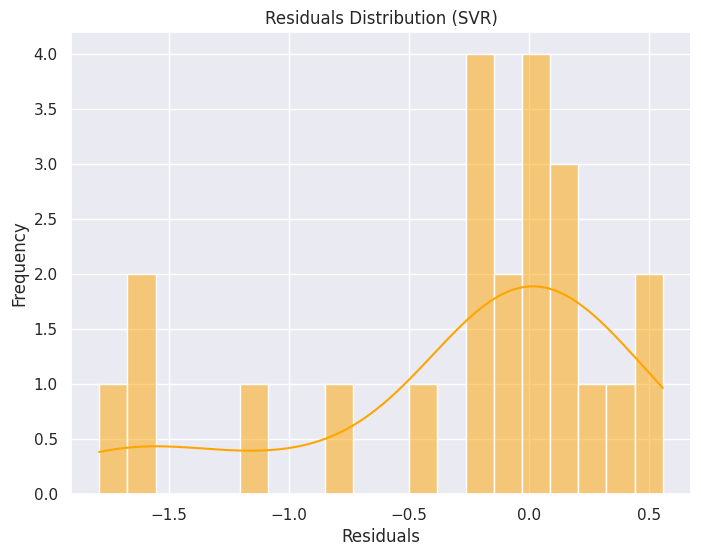

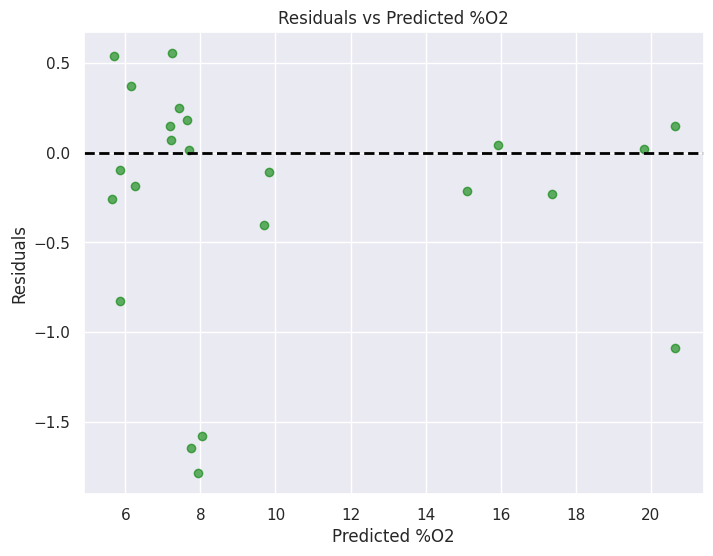

In [77]:

# 1. Scatter plot: Prediksi vs Nilai Aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line for perfect prediction
plt.text(0.1, 0.9, f'R² = {svr_r2:.4f}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='green')
plt.title('SVR: Predicted vs Actual')
plt.xlabel('Actual %O2')
plt.ylabel('Predicted %O2')
plt.show()

# 2. Residuals plot
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred_svr
sns.histplot(residuals, kde=True, color='orange', bins=20)
plt.title('Residuals Distribution (SVR)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 3. Residuals vs Fitted Values (Checking Homoscedasticity)
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_svr, residuals, color='green', alpha=0.6)
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted %O2')
plt.xlabel('Predicted %O2')
plt.ylabel('Residuals')
plt.show()


In [78]:
# import tensorflow as tf
# from sklearn.model_selection import KFold, cross_val_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.neural_network import MLPRegressor

In [79]:
# def run_kfold(X_train, y_train, k, random_st):
#     """Run a KFold Cross-validation with given arguments
#         X_train: the input that will train the model,
#         y_train: the expected value for the input,
#         k: the number of splits for the kfold,
#         random_st: the random state number to keep things consistent"""
#     kfold = KFold(n_splits=k, shuffle=True, random_state=random_st)

#     regr_AI12104 = MLPRegressor(random_state=101, max_iter=5000, early_stopping=True).fit(X_train, y_train)
#     # K-fold cross-validation in X_train
#     results = np.round(cross_val_score(regr_AI12104, X_train, y_train, cv=kfold),2)

#     # Show the resuls of cross-validation
#     pd.set_option('display.max_rows', None)
#     print(results)
#     res_mean_std=(round(results.mean(),2), round(results.std(),2))
#     print(res_mean_std)
#     #print(X_train)
#     return(results, res_mean_std)

In [80]:
# i=0
# results=[]
# results=np.array(results)
# for i in range(0,23):
#     print("Number of iterations: ",i+1)
#     results=np.append(run_kfold(x_data, y, 5, 101+i)[0],results)
# print("The mean of R2s in is ", round(results.mean(),3), "with a std deviation of ", round(results.std(),3))